In [1]:
%matplotlib inline

import pandas as pd
import scanpy as sc
import numpy as np
import matplotlib.pyplot as plt
import scipy.sparse as sp
from scipy.stats import pearsonr
from matplotlib.pyplot import rc_context
from sklearn import metrics

import seaborn as sns
import sys
import os

sys.path.append('../../../Code/')
from utils import read_dataset_log

sys.path.append('../../../Code/starCAT')
from starcat import starCAT

In [2]:
from matplotlib import rcParams, font_manager
import matplotlib


rcParams['pdf.fonttype'] = 42
rcParams['ps.fonttype'] = 42
rcParams['font.family'] = 'sans-serif'
rcParams['font.sans-serif'] = ['Arial']
label_fontsize = 10
tick_fontsize = 8

In [3]:
figdir = '../../../Figures/Components'

In [4]:
from matplotlib import colors

In [5]:
! pwd

/data/srlab1/TCAT/Analysis/PerDataset/Sparks


In [6]:
params = read_dataset_log('Dataset Paths')
params.index = params['dataset']
params

dataset                                           usage_fn  \
dataset                                                                       
AMP-RA            AMP-RA  /data/srlab1/TCAT/Data/PerDataset/AMPRA/AMPRA....   
Pan-Cancer    Pan-Cancer  /data/srlab1/TCAT/Data/PerDataset/Pancancer/Pa...   
TBRU                TBRU  /data/srlab1/TCAT/Data/PerDataset/TBRU/TBRU.20...   
HIV-Vaccine  HIV-Vaccine  /data/srlab1/TCAT/Data/PerDataset/HaoEtAl/HIVV...   
UK-Covid        UK-Covid  /data/srlab1/TCAT/Data/PerDataset/UKCOVID/UKCO...   
COMBAT            COMBAT  /data/srlab1/TCAT/Data/PerDataset/COMBAT/COMBA...   
Pan-Tissue    Pan-Tissue  /data/srlab1/TCAT/Data/PerDataset/XTissueImmun...   
Sparks            Sparks                                                NaN   
Stimseq          Stimseq                                                NaN   

                                                gene_scores_fn  \
dataset                                                          
AMP-RA       /data/srlab1/TCAT/Data/PerDataset/AMPRA/AMPRA....   
Pan-Cancer   /data/srlab1/TCAT/Data/PerDataset/Pancancer/Pa...   
TBRU         /data/srlab1/TCAT/Data/PerDataset/TBRU/TBRU.20...   
HIV-Vaccine  /data/srlab1/TCAT/Data/PerDataset/HaoEtAl/HIVV...   
UK-Covid     /data/srlab1/TCAT/Data/PerDataset/UKCOVID/UKCO...   
COMBAT       /data/srlab1/TCAT/Data/PerDataset/COMBAT/COMBA...   
Pan-Tissue   /data/srlab1/TCAT/Data/PerDataset/XTissueImmun...   
Sparks                                                     NaN   
Stimseq                                                    NaN   

                                                   gene_tpm_fn  \
dataset                                                          
AMP-RA       /data/srlab1/TCAT/Data/PerDataset/AMPRA/AMPRA....   
Pan-Cancer   /data/srlab1/TCAT/Data/PerDataset/Pancancer/Pa...   
TBRU         /data/srlab1/TCAT/Data/PerDataset/TBRU/TBRU.20...   
HIV-Vaccine  /data/srlab1/TCAT/Data/PerDataset/HaoEtAl/HIVV...   
UK-Covid     /data/srlab1/TCAT/Data/PerDataset/UKCOVID/UKCO...   
COMBAT       /data/srlab1/TCAT/Data/PerDataset/COMBAT/COMBA...   
Pan-Tissue   /data/srlab1/TCAT/Data/PerDataset/XTissueImmun...   
Sparks                                                     NaN   
Stimseq                                                    NaN   

                                                       tcat_fn  \
dataset                                                          
AMP-RA       /data/srlab1/TCAT/Data/TCAT/TCAT_Usage.2023101...   
Pan-Cancer   /data/srlab1/TCAT/Data/TCAT/TCAT_Usage.2023101...   
TBRU         /data/srlab1/TCAT/Data/TCAT/TCAT_Usage.2023101...   
HIV-Vaccine  /data/srlab1/TCAT/Data/TCAT/TCAT_Usage.2023101...   
UK-Covid     /data/srlab1/TCAT/Data/TCAT/TCAT_Usage.2023101...   
COMBAT       /data/srlab1/TCAT/Data/TCAT/TCAT_Usage.2023101...   
Pan-Tissue   /data/srlab1/TCAT/Data/TCAT/TCAT_Usage.2023101...   
Sparks       /data/srlab1/TCAT/Data/TCAT/TCAT_Usage.2023101...   
Stimseq      /data/srlab1/TCAT/Data/PerDataset/Stimseq/TCAT...   

                                        tcat_fn_withsingletons  \
dataset                                                          
AMP-RA       /data/srlab1/TCAT/Data/TCAT/TCAT_Usage.2023101...   
Pan-Cancer   /data/srlab1/TCAT/Data/TCAT/TCAT_Usage.2023101...   
TBRU         /data/srlab1/TCAT/Data/TCAT/TCAT_Usage.2023101...   
HIV-Vaccine  /data/srlab1/TCAT/Data/TCAT/TCAT_Usage.2023101...   
UK-Covid     /data/srlab1/TCAT/Data/TCAT/TCAT_Usage.2023101...   
COMBAT       /data/srlab1/TCAT/Data/TCAT/TCAT_Usage.2023101...   
Pan-Tissue   /data/srlab1/TCAT/Data/TCAT/TCAT_Usage.2023101...   
Sparks                                                     NaN   
Stimseq                                                    NaN   

                                                     scores_fn  \
dataset                                                          
AMP-RA                                                     NaN   
Pan-Cancer                               

In [7]:
gep_info = read_dataset_log('cGEP_Name')
rename_map = dict(zip(gep_info['cGep_Name'], gep_info['Short_Name']))


# Run TCAT

In [8]:
dataset = 'Sparks'
toadd = '.20231016.FiltSingletons'

In [9]:
adata = sc.read(params.loc[dataset, 'raw_counts_fn'])

In [9]:
metagep_params = read_dataset_log('cGEP Paths').iloc[0,:]
metagep_params

clustering_fn                                  /data/srlab1/TCAT/Data/TCAT/cluster_groups.pai...
clustering_with_singletons_fn                  /data/srlab1/TCAT/Data/TCAT/cluster_groups.pai...
merged_hvgs                                    /data/srlab1/TCAT/Data/TCAT/MergedHVG_UnionAll...
reference_fn                                   /data/srlab1/TCAT/Data/TCAT/merged_spectra.Gen...
renamed_ref_fn                                 /data/srlab1/TCAT/Data/TCAT/merged_spectra.Gen...
tpm_varnorm_spectra                            /data/srlab1/TCAT/Data/TCAT/merged_spectra.Gen...
tpm_varnorm_spectra_withsingletons             /data/srlab1/TCAT/Data/TCAT/merged_spectra.Gen...
tpm_renorm_varnorm_spectra                     /data/srlab1/TCAT/Data/TCAT/merged_spectra.Gen...
tpm_renorm_varnorm_spectra_withsingletons      /data/srlab1/TCAT/Data/TCAT/merged_spectra.Gen...
scores_spectra                                 /data/srlab1/TCAT/Data/TCAT/merged_spectra.Gen...
scores_spectra_withsingletons 

In [10]:
ref_fn = metagep_params['reference_fn']
print(ref_fn)

/data/srlab1/TCAT/Data/TCAT/merged_spectra.Gene_TPM_Renorm_VarNorm.Gene_Intersection.TPMrenorm.VarNorm.HVGunion.FiltSingletons.Mean.20231016.filteredHVG.tsv


In [154]:
pd.read_csv(ref_fn, sep='\t', index_col=0).shape

(52, 3412)

In [ ]:
tmod = starCAT(reference=ref_fn)
usage_sparks, _ = tmod.fit_transform(adata, return_unnormalized=True)

In [13]:
# outfn = '../../../Data/TCAT/TCAT_Usage%s.%s.tsv' % (toadd, dataset)
# print(outfn)
# usage_sparks.to_csv(outfn, sep='\t')

../../../Data/TCAT/TCAT_Usage.20231016.FiltSingletons.Sparks.tsv


In [11]:
outfn = '../../../Data/TCAT/TCAT_Usage%s.%s.tsv' % (toadd, dataset)

usage_sparks= pd.read_csv(outfn, sep='\t', index_col =0)

In [12]:
usage_norm = usage_sparks.div(usage_sparks.sum(axis=1), axis=0)

In [14]:
del(adata)

# Prepare file paths and load data

In [13]:
gating = pd.read_csv(params.loc[dataset, 'manual_gating_fn'], index_col = 0, sep = '\t',
                     header=0, names = ['cell_gating'])

meta = pd.read_csv(params.loc[dataset, 'metadata_fn'], index_col = 0, sep = '\t')
meta['cell_gating'] = gating.loc[meta.index, 'cell_gating']
meta = meta.loc[usage_norm.index, ]

cluster_col = params.loc[dataset, 'cluster_col']

/tmp/ipykernel_65455/4229900250.py:4: DtypeWarning: Columns (12) have mixed types. Specify dtype option on import or set low_memory=False.
  meta = pd.read_csv(params.loc[dataset, 'metadata_fn'], index_col = 0, sep = '\t')


In [17]:
params.loc[dataset, 'metadata_fn']

'/data/srlab1/TCAT/Data/PerDataset/Sparks2023/T_fromSeuratmetadata_RNAClustering_withSampID.tsv'

In [18]:
meta.head(3)

alt.subject.id visit  \
Batch1_COVFLU_CITE_multi5P09_GCATGCGCAGCCTATA-1        Control   NaN   
Batch1_COVFLU_CITE_multi5P02_TTGTAGGCAGTATCTG-1        Control   NaN   
Batch1_COVFLU_CITE_multi5P02_GATGCTACAGCTTAAC-1        Control   NaN   

                                                 covid.diagnosis.start.date.to.sample.drawn  \
Batch1_COVFLU_CITE_multi5P09_GCATGCGCAGCCTATA-1                                         NaN   
Batch1_COVFLU_CITE_multi5P02_TTGTAGGCAGTATCTG-1                                         NaN   
Batch1_COVFLU_CITE_multi5P02_GATGCTACAGCTTAAC-1                                         NaN   

                                                group  sex  age race  \
Batch1_COVFLU_CITE_multi5P09_GCATGCGCAGCCTATA-1   NaN  NaN  NaN  NaN   
Batch1_COVFLU_CITE_multi5P02_TTGTAGGCAGTATCTG-1   NaN  NaN  NaN  NaN   
Batch1_COVFLU_CITE_multi5P02_GATGCTACAGCTTAAC-1   NaN  NaN  NaN  NaN   

                                                ethnicity  flu.vax.count.10yr  \
Batch1_COVFLU_CITE_multi5P09_GCATGCGCAGCCTATA-1       NaN                 NaN   
Batch1_COVFLU_CITE_multi5P02_TTGTAGGCAGTATCTG-1       NaN                 NaN   
Batch1_COVFLU_CITE_multi5P02_GATGCTACAGCTTAAC-1       NaN                 NaN   

                                                vaccine  ... leiden_res2_25  \
Batch1_COVFLU_CITE_multi5P09_GCATGCGCAGCCTATA-1     NaN  ...              5   
Batch1_COVFLU_CITE_multi5P02_TTGTAGGCAGTATCTG-1     NaN  ...              1   
Batch1_COVFLU_CITE_multi5P02_GATGCTACAGCTTAAC-1     NaN  ...              2   

                                                leiden_res2 leiden_res1_75  \
Batch1_COVFLU_CITE_multi5P09_GCATGCGCAGCCTATA-1           5              5   
Batch1_COVFLU_CITE_multi5P02_TTGTAGGCAGTATCTG-1           1              1   
Batch1_COVFLU_CITE_multi5P02_GATGCTACAGCTTAAC-1           2              2   

                                                 leiden_res1_5  \
Batch1_COVFLU_CITE_multi5P09_GCATGCGCAGCCTATA-1              4   
Batch1_COVFLU_CITE_multi5P02_TTGTAGGCAGTATCTG-1              1   
Batch1_COVFLU_CITE_multi5P02_GATGCTACAGCTTAAC-1              0   

                                                 leiden_res1_25  \
Batch1_COVFLU_CITE_multi5P09_GCATGCGCAGCCTATA-1               0   
Batch1_COVFLU_CITE_multi5P02_TTGTAGGCAGTATCTG-1               2   
Batch1_COVFLU_CITE_multi5P02_GATGCTACAGCTTAAC-1               1   

                                                 leiden_res0_75  \
Batch1_COVFLU_CITE_multi5P09_GCATGCGCAGCCTATA-1               0   
Batch1_COVFLU_CITE_multi5P02_TTGTAGGCAGTATCTG-1               4   
Batch1_COVFLU_CITE_multi5P02_GATGCTACAGCTTAAC-1               2   

                                                 leiden_res0_5  \
Batch1_COVFLU_CITE_multi5P09_GCATGCGCAGCCTATA-1              0   
Batch1_COVFLU_CITE_multi5P02_TTGTAGGCAGTATCTG-1              1   
Batch1_COVFLU_CITE_multi5P02_GATGCTACAGCTTAAC-1              0   

                                                 leiden_res0_25  \
Batch1_COVFLU_CITE_multi5P09_GCATGCGCAGCCTATA-1               0   
Batch1_COVFLU_CITE_multi5P02_TTGTAGGCAGTATCTG-1               1   
Batch1_COVFLU_CITE_multi5P02_GATGCTACAGCTTAAC-1               0   

                                                 alt.sample.id  cell_gating  
Batch1_COVFLU_CITE_multi5P09_GCATGCGCAGCCTATA-1        Control    CD4_Naive  
Batch1_COVFLU_CITE_multi5P02_TTGTAGGCAGTATCTG-1        Control       CD4_CM  
Batch1_COVFLU_CITE_multi5P02_GATGCTACAGCTTAAC-1        Control    CD4_Naive  

[3 rows x 43 columns]

In [14]:
train_dir = '/data/srlab1/TCAT/Data/PerDataset/COMBAT'
test_dir =  '/data/srlab1/TCAT/Data/PerDataset/Sparks2023'

original =  '../../../Data/PerDataset/Sparks2023/T_fromSeurat.h5ad'
toadd = ''
paths = {
        'Original' : original, # AnnData containing RNA +/- ADT,
        'RNA_LogTP10K_Varnorm_Harmony':original.replace('.h5ad', toadd + 'RNA.LogTP10K.Varnorm.Harmony.h5ad'),
        'Metadata_RNAClustering' : original.replace('.h5ad', toadd + 'metadata_RNAClustering.tsv')
        }
paths

{'Original': '../../../Data/PerDataset/Sparks2023/T_fromSeurat.h5ad',
 'RNA_LogTP10K_Varnorm_Harmony': '../../../Data/PerDataset/Sparks2023/T_fromSeuratRNA.LogTP10K.Varnorm.Harmony.h5ad',
 'Metadata_RNAClustering': '../../../Data/PerDataset/Sparks2023/T_fromSeuratmetadata_RNAClustering.tsv'}

In [15]:
paths.update({
        'clus_roc':original.replace('T_fromSeurat.h5ad', toadd + 'ROC_PublishedClustering.tsv'),
        'max_identity_roc' : original.replace('T_fromSeurat.h5ad', toadd + 'ROC_MaxIdentityGEP.tsv'),
        'roc' : original.replace('T_fromSeurat.h5ad', toadd + 'ROC_GEPs.tsv'),
        'auc':original.replace('T_fromSeurat.h5ad', toadd + 'AUC_GEPs.tsv'),
        'rna_clus_accuracy_no_overlap':original.replace('T_fromSeurat.h5ad', toadd + 'ROC_RNAClustering_MaxAccuracy_NoOverlap.tsv'),
        'accuracy': original.replace('T_fromSeurat.h5ad', toadd + 'GatePred_Accuracy_AllClusters.tsv'),
        'yasumizu_roc': original.replace('T_fromSeurat.h5ad', toadd + 'Yasumizu_ROC_GEPs.tsv'),
        'yasumizu_auc':original.replace('T_fromSeurat.h5ad', toadd + 'Yasumizu_AUC_GEPs.tsv'),
        'gavish_roc': original.replace('T_fromSeurat.h5ad', toadd + 'Gavish_ROC_GEP_GeneScores.tsv'),
        'gavish_auc':original.replace('T_fromSeurat.h5ad', toadd + 'Gavish_AUC_GEP_GeneScores.tsv'),
    
        'roc_TCAT_MultinomialLogisticRegression' : os.path.join(test_dir, 'ROC_TCAT_MultinomialLogisticRegression.tsv'),
        'auc_TCAT_MultinomialLogisticRegression': os.path.join(test_dir, 'AUC_TCAT_MultinomialLogisticRegression.tsv'),
        'pred_TCAT_MultinomialLogisticRegression': os.path.join(test_dir, 'Predictions_TCAT_MultinomialLogisticRegression.tsv'),
        'predroc_TCAT_MultinomialLogisticRegression': os.path.join(test_dir, 'ROCPredictions_TCAT_MultinomialLogisticRegression.tsv'),
        'model_TCAT_MultinomialLogisticRegression': os.path.join(test_dir, 'model_TCAT_MultinomialLogisticRegression.pkl'),
    
        'roc_Yasu_MultinomialLogisticRegression' : os.path.join(test_dir, 'ROC_Yasu_MultinomialLogisticRegression.tsv'),
        'auc_Yasu_MultinomialLogisticRegression': os.path.join(test_dir, 'AUC_Yasu_MultinomialLogisticRegression.tsv'),
        'pred_Yasu_MultinomialLogisticRegression': os.path.join(test_dir, 'Predictions_Yasu_MultinomialLogisticRegression.tsv'),
        'predroc_Yasu_MultinomialLogisticRegression': os.path.join(test_dir, 'ROCPredictions_Yasu_MultinomialLogisticRegression.tsv'),    
        'model_Yasu_MultinomialLogisticRegression': os.path.join(test_dir, 'model_Yasu_MultinomialLogisticRegression.pkl'),    
    

})
paths

{'Original': '../../../Data/PerDataset/Sparks2023/T_fromSeurat.h5ad',
 'RNA_LogTP10K_Varnorm_Harmony': '../../../Data/PerDataset/Sparks2023/T_fromSeuratRNA.LogTP10K.Varnorm.Harmony.h5ad',
 'Metadata_RNAClustering': '../../../Data/PerDataset/Sparks2023/T_fromSeuratmetadata_RNAClustering.tsv',
 'clus_roc': '../../../Data/PerDataset/Sparks2023/ROC_PublishedClustering.tsv',
 'max_identity_roc': '../../../Data/PerDataset/Sparks2023/ROC_MaxIdentityGEP.tsv',
 'roc': '../../../Data/PerDataset/Sparks2023/ROC_GEPs.tsv',
 'auc': '../../../Data/PerDataset/Sparks2023/AUC_GEPs.tsv',
 'rna_clus_accuracy_no_overlap': '../../../Data/PerDataset/Sparks2023/ROC_RNAClustering_MaxAccuracy_NoOverlap.tsv',
 'accuracy': '../../../Data/PerDataset/Sparks2023/GatePred_Accuracy_AllClusters.tsv',
 'yasumizu_roc': '../../../Data/PerDataset/Sparks2023/Yasumizu_ROC_GEPs.tsv',
 'yasumizu_auc': '../../../Data/PerDataset/Sparks2023/Yasumizu_AUC_GEPs.tsv',
 'gavish_roc': '../../../Data/PerDataset/Sparks2023/Gavish_ROC_GEP

In [18]:
adata_RNA = sc.read(paths['RNA_LogTP10K_Varnorm_Harmony'])

Only considering the two last: ['.Harmony', '.h5ad'].
Only considering the two last: ['.Harmony', '.h5ad'].


In [22]:
adata_RNA

AnnData object with n_obs × n_vars = 336739 × 28402
    obs: 'alt.subject.id', 'visit', 'covid.diagnosis.start.date.to.sample.drawn', 'group', 'sex', 'age', 'race', 'ethnicity', 'flu.vax.count.10yr', 'vaccine', 'vaccine.side.effects', 'long.covid.symptoms', 'Batch', 'nCount_RNA', 'nCount_HTO', 'nCount_CITE', 'nCount_RNA_largest.gene', 'nCount_SCT', 'nFeature_RNA', 'nFeature_HTO', 'nFeature_CITE', 'nFeature_SCT', 'percent.mt', 'percent.largest.gene', 'coarse.cell.type', 'cell.type', 'HTO1', 'HTO2', 'HTO3', 'n_counts', 'leiden_res1', 'leiden_res0_8', 'leiden_res0_6', 'leiden_res2_25', 'leiden_res2', 'leiden_res1_75', 'leiden_res1_5', 'leiden_res1_25', 'leiden_res0_75', 'leiden_res0_5', 'leiden_res0_25'
    var: 'gene_ids', 'feature_types', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'mean', 'std'
    uns: 'hvg', 'leiden', 'log1p', 'neighbors', 'pca', 'umap'
    obsm: 'X_harmony_RNA_UMAP', 'X_pca', 'X_pca_harmony', 'X_umap'
    varm: 'PCs'
    obsp: 'connectivities', 'd

In [16]:
individual_col = params.loc[dataset, 'individual_col']
sample_col = params.loc[dataset, 'sample_col']

In [24]:
adata_RNA.obs[individual_col].unique()

['Control', 'COVR-23', 'HC-12', 'COVR-10', 'COVR-6', ..., 'COVR-14', 'HC-20', 'COVR-2', 'HC-40', 'COVR-26']
Length: 41
Categories (41, object): ['COVR-2', 'COVR-4', 'COVR-6', 'COVR-8', ..., 'HC-35', 'HC-37', 'HC-38', 'HC-40']

In [25]:
adata_RNA

AnnData object with n_obs × n_vars = 336739 × 28402
    obs: 'alt.subject.id', 'visit', 'covid.diagnosis.start.date.to.sample.drawn', 'group', 'sex', 'age', 'race', 'ethnicity', 'flu.vax.count.10yr', 'vaccine', 'vaccine.side.effects', 'long.covid.symptoms', 'Batch', 'nCount_RNA', 'nCount_HTO', 'nCount_CITE', 'nCount_RNA_largest.gene', 'nCount_SCT', 'nFeature_RNA', 'nFeature_HTO', 'nFeature_CITE', 'nFeature_SCT', 'percent.mt', 'percent.largest.gene', 'coarse.cell.type', 'cell.type', 'HTO1', 'HTO2', 'HTO3', 'n_counts', 'leiden_res1', 'leiden_res0_8', 'leiden_res0_6', 'leiden_res2_25', 'leiden_res2', 'leiden_res1_75', 'leiden_res1_5', 'leiden_res1_25', 'leiden_res0_75', 'leiden_res0_5', 'leiden_res0_25'
    var: 'gene_ids', 'feature_types', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'mean', 'std'
    uns: 'hvg', 'leiden', 'log1p', 'neighbors', 'pca', 'umap'
    obsm: 'X_harmony_RNA_UMAP', 'X_pca', 'X_pca_harmony', 'X_umap'
    varm: 'PCs'
    obsp: 'connectivities', 'd

In [26]:
adata_RNA.shape, meta.shape

((336739, 28402), (336739, 43))

In [27]:
meta.columns[meta.columns.str.startswith('leiden_res')]

Index(['leiden_res1', 'leiden_res0_8', 'leiden_res0_6', 'leiden_res2_25',
       'leiden_res2', 'leiden_res1_75', 'leiden_res1_5', 'leiden_res1_25',
       'leiden_res0_75', 'leiden_res0_5', 'leiden_res0_25'],
      dtype='object')

# Calculate statistics

Compare various usage thresholds' ability to predict cell type as defined by cell gatingrna_cluster_col

In [28]:
cluster_col

'cell.type'

In [29]:
meta[cluster_col].value_counts()

CD4_Naive            110879
CD4_CM                57898
CD8_EM                33099
CD8_Naive             31710
CD4_EM                23936
MAIT                  18509
CD8_TEMRA             16101
gdT-Vd2               14904
CD8_CM                10732
CD4_Treg               8162
CD4_platelet_bind      5952
CD8_TRM                2743
CD4_Tfh                1302
CD8_proliferating       812
Name: cell.type, dtype: int64

In [30]:
gating.value_counts()

cell_gating
CD4_Naive      96784
CD4_CM         56439
CD4_EM         40883
CD8_EM         39647
CD8_Naive      29266
MAIT           18065
CD8_TEMRA      16914
gdT            14822
Treg            8146
CD8_CM          5187
CD4_TEMRA       4735
DP              4408
DN              1443
dtype: int64

In [17]:
gates_to_exclude = ['CD4_TEMRA', 'DN', 'DP']
gate_list = list(set(gating['cell_gating'].unique()).difference(gates_to_exclude))

gate_list

['Treg',
 'CD8_Naive',
 'CD4_Naive',
 'CD8_EM',
 'MAIT',
 'CD8_TEMRA',
 'CD4_EM',
 'CD4_CM',
 'gdT',
 'CD8_CM']

In [32]:
len(usage_norm.columns)

52

In [33]:
usage_norm.columns

Index(['CellCycle-G2M', 'CD4-Naive_Translation', 'HLA', 'ISG', 'MALAT1_Mito',
       'Doublet-RBC', 'gdT-Blood', 'CellCycle-S', 'Cytotoxic',
       'Doublet-Platelet', 'HeatShock2', 'S100A10/LMNA', 'MAIT',
       'CellCycle-Histone', 'COMBAT_Cytoskeleton', 'HeatShock1',
       'High-Cytokine', 'KLRC2/GNLY_gdT', 'Doublet-Myeloid', 'Metallothionein',
       'CD4 TCM_Tfh', 'IEG_IEG-Blood_IEG-Tissue', 'CD8_EM', 'IEG_YPEL5/CREM_1',
       'CD4-Naive_TBRU', 'Treg', 'Th17', 'MALAT1_TBRU', 'CD8-Naive',
       'RGCC/MYADM_S100A10/LMNA', 'TIMD4/CD38', 'AMP-RA_Doublet-Plasma',
       'BCL2/CDK6', 'IL10/CD38', 'CCR3+-Th2', 'Th2', 'ICOS/ACTG1',
       'Doublet-Bcell', 'CD4 TEM', 'CTLA4+CD38+_IL26/CTSH', 'CD8/KLRC2',
       'IL26/CTSH', 'AMP-RA_Tfh', 'EBI3-Activation', 'HIV-Vaccine',
       'IEG_YPEL5/CREM_2', 'AMP-RA_Pan-Cancer', 'SOX4/MME',
       'CH25H/DDIT4_Pan-Cancer', 'AMP-RA:Tph_Single', 'Pan-Cancer:Tph_Single',
       'Pan-Cancer:Tfh_Single'],
      dtype='object')

In [34]:
meta[cluster_col].value_counts()

CD4_Naive            110879
CD4_CM                57898
CD8_EM                33099
CD8_Naive             31710
CD4_EM                23936
MAIT                  18509
CD8_TEMRA             16101
gdT-Vd2               14904
CD8_CM                10732
CD4_Treg               8162
CD4_platelet_bind      5952
CD8_TRM                2743
CD4_Tfh                1302
CD8_proliferating       812
Name: cell.type, dtype: int64

In [35]:
gate_list

['CD8_TEMRA',
 'gdT',
 'CD8_Naive',
 'Treg',
 'CD8_EM',
 'CD4_EM',
 'CD4_Naive',
 'CD4_CM',
 'MAIT',
 'CD8_CM']

In [18]:
gate_clusters = [['CD8_CM'], ['CD4_EM'], ['CD4_CM'], ['CD8_EM'],  ['CD8_TEMRA'], ['CD8_Naive'],
                 ['gdT-Vd2'], ['CD4_Treg'], ['MAIT'], ['CD4_Naive'],
                ]

In [19]:
gate_dict = {'CD8_TEMRA': ['CD8_TEMRA'],
 'Treg': ['CD4_Treg'],
 'CD4_EM': ['CD4_EM'],
 'CD4_CM': ['CD4_CM'],
 'CD8_CM': ['CD8_CM'],
 'CD8_EM': ['CD8_EM'],
 'CD8_Naive': ['CD8_Naive'],
 'MAIT': ['MAIT'],
 'CD4_Naive': ['CD4_Naive'],
 'gdT': ['gdT-Vd2']}

gate_dict

{'CD8_TEMRA': ['CD8_TEMRA'],
 'Treg': ['CD4_Treg'],
 'CD4_EM': ['CD4_EM'],
 'CD4_CM': ['CD4_CM'],
 'CD8_CM': ['CD8_CM'],
 'CD8_EM': ['CD8_EM'],
 'CD8_Naive': ['CD8_Naive'],
 'MAIT': ['MAIT'],
 'CD4_Naive': ['CD4_Naive'],
 'gdT': ['gdT-Vd2']}

In [20]:
# Filter out cells in other lineages
ind = gating[-gating['cell_gating'].isin(gates_to_exclude)].index
meta_test = meta.loc[ind, :]
gating_test = gating.loc[ind, :]
usage_test = usage_norm.loc[ind, :].rename(columns=rename_map)

## ROC/AUC: GEP usage, ADT cluster, Max identity GEP for TCAT

In [39]:
usage_test.columns

Index(['CellCycle-G2M', 'Translation', 'HLA', 'ISG', 'Mito', 'Doublet-RBC',
       'gdT', 'CellCycle-S', 'Cytotoxic', 'Doublet-Platelet', 'NME1/FABP5',
       'Th22', 'MAIT', 'CellCycle-Late-S', 'Cytoskeleton', 'Heatshock',
       'Multi-Cytokine', 'TEMRA', 'Doublet-Myeloid', 'Metallothionein',
       'CD4-CM', 'IEG', 'CD8-EM', 'IEG2', 'CD4-Naive', 'Treg', 'Th17-Resting',
       'Poor-Quality', 'CD8-Naive', 'RGCC/MYADM', 'TIMD4/TIM3',
       'Doublet-Plasmablast', 'BCL2/FAM13A', 'IL10/IL19', 'Th2-Activated',
       'Th2-Resting', 'ICOS/CD38', 'Doublet-Bcell', 'Th1-Like', 'CTLA4/CD38',
       'CD8-Trm', 'Th17-Activated', 'Tfh-2', 'OX40/EBI3', 'CD172a/MERTK',
       'IEG3', 'Doublet-Fibroblast', 'SOX4/TOX2', 'CD40LG/TXNIP', 'Tph',
       'Exhaustion', 'Tfh-1'],
      dtype='object')

In [40]:
yasumizu_usage = pd.read_csv('../../../Data/PerDataset/Sparks2023/Yasumizu_NMFproject_Usage_TPMscale.tsv', sep='\t', index_col=0)
yasumizu_usage = yasumizu_usage.loc[usage_test.index, :]

In [41]:
clus_roc = pd.DataFrame(columns = ['gate', 'cluster', 'sensitivity', 'specificity'])
roc = pd.DataFrame(columns = ['program', 'gate', 'type', 'sensitivity', 'specificity', 'threshold'])
auc = pd.DataFrame(columns = ['program', 'gate', 'type', 'auc'])

for gate_type in gate_list:    
    print(gate_type)
    gates = meta_test['cell_gating'] == gate_type

    ### Threshold usages
    # Choose prg with max AUC
    prg_auc_last = 0
    max_auc_prg = None
    for prg in usage_test.columns:
        prg_auc = metrics.roc_auc_score(gates, usage_test[prg])
        if prg_auc > prg_auc_last:
            prg_auc_last = prg_auc
            max_auc_prg = prg
    
    prg = max_auc_prg
        
    fpr, tpr, threshold = metrics.roc_curve(gates, usage_test[prg], pos_label = True)
    auc = auc.append(pd.Series([prg, gate_type, 
                                'usages', metrics.auc(fpr, tpr)], index=auc.columns), ignore_index=True)
    roc = pd.concat([roc, pd.DataFrame(dict(zip(roc.columns, [prg, gate_type, 'usages', tpr, 1-fpr, threshold])))])

    ### Cluster scoring, where program can match multiple clusters
    clus_types = tuple(gate_dict[gate_type])

    clus_roc = clus_roc.append(pd.Series([gate_type, clus_types, 0, 0], index=clus_roc.columns),
                   ignore_index=True)    
    
    pred = meta_test[cluster_col].isin(clus_types)

    fpr_clus, tpr_clus, _ = metrics.roc_curve(gates, pred, pos_label = True)    
    clus_roc.loc[((clus_roc['gate']==gate_type) & (clus_roc['cluster']==clus_types)), 
                 'sensitivity'] = tpr_clus[1]
    clus_roc.loc[((clus_roc['gate']==gate_type)  & (clus_roc['cluster']==clus_types)), 
                 'specificity'] = 1 - fpr_clus[1]

CD8_TEMRA
gdT
CD8_Naive
Treg
CD8_EM
CD4_EM
CD4_Naive
CD4_CM
MAIT
CD8_CM


In [42]:
auc

program       gate    type       auc
0         TEMRA  CD8_TEMRA  usages  0.867251
1           gdT        gdT  usages  0.986851
2     CD8-Naive  CD8_Naive  usages  0.960151
3          Treg       Treg  usages  0.954664
4        CD8-EM     CD8_EM  usages  0.896949
5  Th17-Resting     CD4_EM  usages  0.787439
6     CD4-Naive  CD4_Naive  usages  0.952606
7   Th2-Resting     CD4_CM  usages  0.823162
8          MAIT       MAIT  usages  0.993953
9       CD8-Trm     CD8_CM  usages  0.789419

## ROC/AUC: GEP usage, ADT cluster, Max identity GEP for NMFproject

In [43]:
yasumizu_roc = pd.DataFrame(columns = ['program', 'gate', 'type', 'sensitivity', 'specificity', 'threshold'])
yasumizu_auc = pd.DataFrame(columns = ['program', 'gate', 'type', 'auc'])

for gate_type in gate_list:    
    print(gate_type)
    # prg = gate_dict[gate_type][0]
    gates = meta_test['cell_gating'] == gate_type

    ### Threshold usages
    # Choose prg with max AUC
    prg_auc_last = 0
    max_auc_prg = None
    for prg in yasumizu_usage.columns:
        prg_auc = metrics.roc_auc_score(gates, yasumizu_usage[prg])
        if prg_auc > prg_auc_last:
            prg_auc_last = prg_auc
            max_auc_prg = prg
    
    prg = max_auc_prg
        
    fpr, tpr, threshold = metrics.roc_curve(gates, yasumizu_usage[prg], pos_label = True)
    yasumizu_auc = yasumizu_auc.append(pd.Series([prg, gate_type, 
                                'usages', metrics.auc(fpr, tpr)], index=yasumizu_auc.columns), ignore_index=True)
    yasumizu_roc = pd.concat([yasumizu_roc, pd.DataFrame(dict(zip(yasumizu_roc.columns, [prg, gate_type, 'usages', tpr, 1-fpr, threshold])))])
    

CD8_TEMRA
gdT
CD8_Naive
Treg
CD8_EM
CD4_EM
CD4_Naive
CD4_CM
MAIT
CD8_CM


In [44]:
yasumizu_auc

program       gate    type       auc
0   NMF0 Cytotoxic-F  CD8_TEMRA  usages  0.868197
1   NMF0 Cytotoxic-F        gdT  usages  0.881823
2       NMF3 Naive-F  CD8_Naive  usages  0.758243
3         NMF5 Th2-F       Treg  usages  0.894516
4   NMF0 Cytotoxic-F     CD8_EM  usages  0.839802
5  NMF8 Cent. Mem.-F     CD4_EM  usages  0.768267
6       NMF3 Naive-F  CD4_Naive  usages  0.885190
7  NMF8 Cent. Mem.-F     CD4_CM  usages  0.773352
8        NMF2 Th17-F       MAIT  usages  0.965594
9        NMF11 Th1-F     CD8_CM  usages  0.683259

## ROC/AUC: GEP usage, ADT cluster, Max identity GEP for Gavish_ScanpyScore_Usage

In [45]:
gavish_roc = pd.DataFrame(columns = ['program', 'gate', 'type', 'sensitivity', 'specificity', 'threshold'])
gavish_auc = pd.DataFrame(columns = ['program', 'gate', 'type', 'auc'])

gavish_scores = pd.read_csv('../../../Data/PerDataset/Sparks2023/Gavish_ScanpyScore_Usage.tsv', sep='\t', index_col=0)
overlap = list(set(gavish_scores.index).intersection(meta_test.index))
gavish_scores = gavish_scores.loc[overlap, :]
meta_test_gavish = meta_test.loc[overlap, :]

for gate_type in gate_list:    
    print(gate_type)
    # prg = gate_dict[gate_type][0]
    gates = meta_test_gavish['cell_gating'] == gate_type

    ### Threshold usages
    # Choose prg with max AUC
    prg_auc_last = 0
    max_auc_prg = None
    for prg in gavish_scores.columns:
        prg_auc = metrics.roc_auc_score(gates, gavish_scores[prg])
        if prg_auc > prg_auc_last:
            prg_auc_last = prg_auc
            max_auc_prg = prg
    
    prg = max_auc_prg
        
    fpr, tpr, threshold = metrics.roc_curve(gates, gavish_scores[prg], pos_label = True)
    gavish_auc = gavish_auc.append(pd.Series([prg, gate_type, 
                                'usages', metrics.auc(fpr, tpr)], index=gavish_auc.columns), ignore_index=True)
    gavish_roc = pd.concat([gavish_roc, pd.DataFrame(dict(zip(gavish_roc.columns, [prg, gate_type, 'usages', tpr, 1-fpr, threshold])))])
    

CD8_TEMRA
gdT
CD8_Naive
Treg
CD8_EM
CD4_EM
CD4_Naive
CD4_CM
MAIT
CD8_CM


## Save results

In [46]:
clus_roc.to_csv(paths['clus_roc'], sep='\t')
# max_identity_roc.to_csv(paths['max_identity_roc'], sep='\t')
roc.to_csv(paths['roc'], sep='\t')
auc.to_csv(paths['auc'], sep='\t')
yasumizu_roc.to_csv(paths['yasumizu_roc'], sep='\t')
yasumizu_auc.to_csv(paths['yasumizu_auc'], sep='\t')

gavish_roc.to_csv(paths['gavish_roc'], sep='\t')
gavish_auc.to_csv(paths['gavish_auc'], sep='\t')

# Load results

In [20]:
paths

{'Original': '../../../Data/PerDataset/Sparks2023/T_fromSeurat.h5ad',
 'RNA_LogTP10K_Varnorm_Harmony': '../../../Data/PerDataset/Sparks2023/T_fromSeuratRNA.LogTP10K.Varnorm.Harmony.h5ad',
 'Metadata_RNAClustering': '../../../Data/PerDataset/Sparks2023/T_fromSeuratmetadata_RNAClustering.tsv',
 'clus_roc': '../../../Data/PerDataset/Sparks2023/ROC_PublishedClustering.tsv',
 'max_identity_roc': '../../../Data/PerDataset/Sparks2023/ROC_MaxIdentityGEP.tsv',
 'roc': '../../../Data/PerDataset/Sparks2023/ROC_GEPs.tsv',
 'auc': '../../../Data/PerDataset/Sparks2023/AUC_GEPs.tsv',
 'rna_clus_accuracy_no_overlap': '../../../Data/PerDataset/Sparks2023/ROC_RNAClustering_MaxAccuracy_NoOverlap.tsv',
 'accuracy': '../../../Data/PerDataset/Sparks2023/GatePred_Accuracy_AllClusters.tsv',
 'yasumizu_roc': '../../../Data/PerDataset/Sparks2023/Yasumizu_ROC_GEPs.tsv',
 'yasumizu_auc': '../../../Data/PerDataset/Sparks2023/Yasumizu_AUC_GEPs.tsv',
 'gavish_roc': '../../../Data/PerDataset/Sparks2023/Gavish_ROC_GEP

In [21]:
roc_multi = pd.read_csv(paths['roc_TCAT_MultinomialLogisticRegression'], index_col = 0, sep = '\t')
auc_multi = pd.read_csv(paths['auc_TCAT_MultinomialLogisticRegression'], index_col = 0, sep = '\t')
pred_multi = pd.read_csv(paths['pred_TCAT_MultinomialLogisticRegression'], index_col = 0, sep = '\t')
predroc_multi = pd.read_csv(paths['predroc_TCAT_MultinomialLogisticRegression'], index_col = 0, sep = '\t')

In [22]:
clus_roc = pd.read_csv(paths['clus_roc'], index_col = 0, sep='\t')
max_identity_roc = pd.read_csv(paths['max_identity_roc'], index_col = 0, sep='\t')
roc = pd.read_csv(paths['roc'], index_col = 0, sep='\t')
auc = pd.read_csv(paths['auc'], index_col = 0, sep='\t')
rna_clus_accuracy = pd.read_csv(paths['rna_clus_accuracy_no_overlap'], index_col = 0, sep='\t')
# rna_clus_accuracy_all = pd.read_csv(paths['rna_clus_accuracy_all'], index_col = 0, sep='\t')


In [23]:
yasumizu_roc = pd.read_csv(paths['yasumizu_roc'], sep='\t', index_col=0)
yasumizu_auc = pd.read_csv(paths['yasumizu_auc'], sep='\t', index_col=0)

#yasumizu_roc_cd4 = pd.read_csv(paths['yasumizu_roc_cd4'], sep='\t', index_col=0)
#yasumizu_auc_cd4 = pd.read_csv(paths['yasumizu_auc_cd4'], sep='\t', index_col=0)

In [24]:
gavish_roc = pd.read_csv(paths['gavish_roc'], sep='\t', index_col=0)
gavish_auc = pd.read_csv(paths['gavish_auc'], sep='\t', index_col=0)


In [25]:
yasumizu_roc_multi = pd.read_csv(paths['roc_Yasu_MultinomialLogisticRegression'], sep='\t', index_col=0)
yasumizu_auc_multi = pd.read_csv(paths['auc_Yasu_MultinomialLogisticRegression'], sep='\t', index_col=0)

#yasumizu_roc_multi_cd4 = pd.read_csv(paths['roc_Yasu_CD4_MultinomialLogisticRegression'], sep='\t', index_col=0)
#yasumizu_auc_multi_cd4 = pd.read_csv(paths['auc_Yasu_CD4_MultinomialLogisticRegression'], sep='\t', index_col=0)


In [26]:
yasumizu_roc.head()

program       gate    type  sensitivity  specificity  threshold
0  NMF0 Cytotoxic-F  CD8_TEMRA  usages     0.000000     1.000000   6.307474
1  NMF0 Cytotoxic-F  CD8_TEMRA  usages     0.000059     1.000000   5.307474
2  NMF0 Cytotoxic-F  CD8_TEMRA  usages     0.000059     0.999984   5.069603
3  NMF0 Cytotoxic-F  CD8_TEMRA  usages     0.000177     0.999984   5.018092
4  NMF0 Cytotoxic-F  CD8_TEMRA  usages     0.000177     0.999977   4.854701

In [26]:
auc_multi = pd.read_csv(paths['auc_TCAT_MultinomialLogisticRegression'], index_col = 0, sep = '\t')
auc_multi

gate       auc
0     CD4_CM  0.927644
1     CD4_EM  0.923000
2  CD4_Naive  0.984135
3     CD8_CM  0.912104
4     CD8_EM  0.965358
5  CD8_Naive  0.983619
6  CD8_TEMRA  0.939657
7       MAIT  0.995274
8       Treg  0.983392
9        gdT  0.985826

In [23]:
rna_clus_accuracy

gate clusters     cluster_col  sensitivity  specificity  accuracy
0       CD4_EM     1,12     leiden_res1     0.586381     0.917580  0.751980
1    CD4_Naive      0,2     leiden_res1     0.896491     0.962039  0.929265
2         MAIT        6     leiden_res1     0.938998     0.988568  0.963783
3         Treg  9,13,15     leiden_res1     0.769948     0.979343  0.874646
4          gdT        3     leiden_res1     0.794967     0.915318  0.855143
..         ...      ...             ...          ...          ...       ...
105     CD4_CM        1  leiden_res0_25     0.775776     0.862135  0.818956
106     CD8_CM        8  leiden_res0_25     0.007904     0.997286  0.502595
107     CD8_EM      2,9  leiden_res0_25     0.869725     0.880924  0.875325
108  CD8_TEMRA        5  leiden_res0_25     0.071184     0.958000  0.514592
109  CD8_Naive        3  leiden_res0_25     0.886011     0.986439  0.936225

[110 rows x 6 columns]

In [24]:
roc_multi

gate  sensitivity  specificity
0     CD4_CM     0.000000     1.000000
1     CD4_CM     0.000000     0.999996
2     CD4_CM     0.000035     0.999996
3     CD4_CM     0.000035     0.999993
4     CD4_CM     0.000142     0.999993
...      ...          ...          ...
9177     gdT     0.999865     0.026387
9178     gdT     0.999933     0.026387
9179     gdT     0.999933     0.007847
9180     gdT     1.000000     0.007847
9181     gdT     1.000000     0.000000

[210674 rows x 3 columns]

In [25]:
auc

program       gate    type       auc
0         TEMRA  CD8_TEMRA  usages  0.867251
1           gdT        gdT  usages  0.986851
2     CD8-Naive  CD8_Naive  usages  0.960151
3          Treg       Treg  usages  0.954664
4        CD8-EM     CD8_EM  usages  0.896949
5  Th17-Resting     CD4_EM  usages  0.787439
6     CD4-Naive  CD4_Naive  usages  0.952606
7   Th2-Resting     CD4_CM  usages  0.823162
8          MAIT       MAIT  usages  0.993953
9       CD8-Trm     CD8_CM  usages  0.789419

In [26]:
roc

program       gate    type  sensitivity  specificity     threshold
0        TEMRA  CD8_TEMRA  usages     0.000000     1.000000  1.978123e+00
1        TEMRA  CD8_TEMRA  usages     0.000059     1.000000  9.781227e-01
2        TEMRA  CD8_TEMRA  usages     0.000059     0.999997  8.517689e-01
3        TEMRA  CD8_TEMRA  usages     0.000118     0.999997  8.287962e-01
4        TEMRA  CD8_TEMRA  usages     0.000118     0.999981  7.733948e-01
...        ...        ...     ...          ...          ...           ...
12416  CD8-Trm     CD8_CM  usages     0.999614     0.001358  1.139794e-05
12417  CD8-Trm     CD8_CM  usages     0.999807     0.001358  1.132222e-05
12418  CD8-Trm     CD8_CM  usages     0.999807     0.000801  4.723765e-06
12419  CD8-Trm     CD8_CM  usages     1.000000     0.000801  4.687587e-06
12420  CD8-Trm     CD8_CM  usages     1.000000     0.000000  8.549005e-13

[314876 rows x 6 columns]

## Calculate accuracy across lineages

In [27]:
from functools import reduce

In [28]:
metarnaclust = pd.read_csv(paths['Metadata_RNAClustering'], index_col = 0, sep = '\t')

/tmp/ipykernel_114795/240798655.py:1: DtypeWarning: Columns (12) have mixed types. Specify dtype option on import or set low_memory=False.
  metarnaclust = pd.read_csv(paths['Metadata_RNAClustering'], index_col = 0, sep = '\t')


In [29]:
az_fn = '../../../Data/PerDataset/Sparks2023/T_fromSeurat.FiltForcNMF.Azimuth.tsv'
az_res = pd.read_csv(az_fn, index_col = 0, sep = '\t')
az_res = az_res[az_res.columns[az_res.columns.str.contains('predicted.celltype')]]

/tmp/ipykernel_114795/2264206195.py:2: DtypeWarning: Columns (12) have mixed types. Specify dtype option on import or set low_memory=False.
  az_res = pd.read_csv(az_fn, index_col = 0, sep = '\t')


In [30]:
sym_fn = '../../../Data/PerDataset/Sparks2023/T_fromSeurat.FiltForcNMF.symphony.tsv'
sym_res = pd.read_csv(sym_fn, index_col = 0, sep = '\t')


In [31]:
ptils_allt_fn = '../../../Data/PerDataset/Sparks2023/T_fromSeurat.FiltForcNMF.ProjectTILsAllTMouse.tsv'
ptils_allt = pd.read_csv(ptils_allt_fn, index_col = 0, sep = '\t')
ptils_allt.columns = 'ProjecTILsAllT_' + ptils_allt.columns

In [32]:
comp_all = reduce(lambda l, r: pd.merge(l, r, left_index = True, right_index = True, how='inner'), 
                  [usage_test, pred_multi['0'].rename('Multinomial_Label'), az_res, sym_res,
                   ptils_allt, meta_test['cell_gating'].rename('Gating'), metarnaclust])

In [33]:
comp_all.head(2)

CellCycle-G2M  Translation  \
Batch1_COVFLU_CITE_multi5P09_GCATGCGCAGCCTATA-1       0.001249     0.097659   
Batch1_COVFLU_CITE_multi5P02_TTGTAGGCAGTATCTG-1       0.000686     0.050262   

                                                      HLA       ISG      Mito  \
Batch1_COVFLU_CITE_multi5P09_GCATGCGCAGCCTATA-1  0.002846  0.003858  0.068946   
Batch1_COVFLU_CITE_multi5P02_TTGTAGGCAGTATCTG-1  0.008290  0.005645  0.005134   

                                                 Doublet-RBC       gdT  \
Batch1_COVFLU_CITE_multi5P09_GCATGCGCAGCCTATA-1     0.000825  0.009809   
Batch1_COVFLU_CITE_multi5P02_TTGTAGGCAGTATCTG-1     0.001166  0.001956   

                                                 CellCycle-S  Cytotoxic  \
Batch1_COVFLU_CITE_multi5P09_GCATGCGCAGCCTATA-1     0.002147   0.010658   
Batch1_COVFLU_CITE_multi5P02_TTGTAGGCAGTATCTG-1     0.008756   0.002012   

                                                 Doublet-Platelet  ...  \
Batch1_COVFLU_CITE_multi5P09_GCATGCGCAGCCTATA-1          0.003325  ...   
Batch1_COVFLU_CITE_multi5P02_TTGTAGGCAGTATCTG-1          0.001555  ...   

                                                 leiden_res0_8  leiden_res0_6  \
Batch1_COVFLU_CITE_multi5P09_GCATGCGCAGCCTATA-1              0              0   
Batch1_COVFLU_CITE_multi5P02_TTGTAGGCAGTATCTG-1              4              4   

                                                 leiden_res2_25  leiden_res2  \
Batch1_COVFLU_CITE_multi5P09_GCATGCGCAGCCTATA-1               5            5   
Batch1_COVFLU_CITE_multi5P02_TTGTAGGCAGTATCTG-1               1            1   

                                                 leiden_res1_75  \
Batch1_COVFLU_CITE_multi5P09_GCATGCGCAGCCTATA-1               5   
Batch1_COVFLU_CITE_multi5P02_TTGTAGGCAGTATCTG-1               1   

                                                 leiden_res1_5  \
Batch1_COVFLU_CITE_multi5P09_GCATGCGCAGCCTATA-1              4   
Batch1_COVFLU_CITE_multi5P02_TTGTAGGCAGTATCTG-1              1   

                                                 leiden_res1_25  \
Batch1_COVFLU_CITE_multi5P09_GCATGCGCAGCCTATA-1               0   
Batch1_COVFLU_CITE_multi5P02_TTGTAGGCAGTATCTG-1               2   

                                                 leiden_res0_75  \
Batch1_COVFLU_CITE_multi5P09_GCATGCGCAGCCTATA-1               0   
Batch1_COVFLU_CITE_multi5P02_TTGTAGGCAGTATCTG-1               4   

                                                 leiden_res0_5  leiden_res0_25  
Batch1_COVFLU_CITE_multi5P09_GCATGCGCAGCCTATA-1              0               0  
Batch1_COVFLU_CITE_multi5P02_TTGTAGGCAGTATCTG-1              1               1  

[2 rows x 105 columns]

In [71]:
comp_all.shape

(325420, 109)

In [34]:
comp_all['predicted.celltype.l2_renamed'] = 'Azimuth_' + comp_all['predicted.celltype.l2']
comp_all['Multinomial_Label_renamed'] = 'TCATMultiPred_' + comp_all['Multinomial_Label']
comp_all['cell_type_pred_knn_renamed'] = 'Symphony_' + comp_all['cell_type_pred_knn']

In [35]:
# comp_all['ProjecTILsCD8_functional.cluster_renamed'] = 'ProjecTILsCD8_' + comp_all['ProjecTILsCD8_functional.cluster']
# comp_all['ProjecTILsCD4_functional.cluster_renamed'] = 'ProjecTILsCD4_' + comp_all['ProjecTILsCD4_functional.cluster']
comp_all['ProjecTILsAllT_functional.cluster_renamed'] = 'ProjecTILsAllT_' + comp_all['ProjecTILsAllT_functional.cluster']


In [36]:
gates_map = dict(zip(comp_all['Gating'].unique(), [None]*len(comp_all['Gating'].unique())))
gates_map['CD4_CM'] = [['CD4_CM'], ['CD4 TCM'], ['CD4 TCM'], None]
gates_map['CD4_Naive'] = [['CD4_Naive'], ['CD4 Naive'], ['CD4 Naive'], ['CD4_NaiveLike']]
gates_map['CD4_EM'] = [['CD4_EM'], ['CD4 TEM'], ['CD4 TEM'], ['Tfh', 'Th1']]
gates_map['MAIT'] = [['MAIT'], ['MAIT'], ['MAIT'], None]
gates_map['CD8_CM'] = [['CD8_CM'], ['CD8 TCM'], ['CD8 TCM'], None]
gates_map['CD8_EM'] = [['CD8_EM'], ['CD8 TEM'], ['CD8 TEM'], ['CD8_EffectorMemory']]
gates_map['gdT'] = [['gdT'], ['gdT'], ['gdT'], None]
gates_map['CD8_Naive'] = [['CD8_Naive'], ['CD8 Naive'], ['CD8 Naive'], ['CD8_NaiveLike']]
gates_map['Treg'] = [['Treg'], ['Treg'], ['Treg'], ['Treg']]
gates_map['CD8_TEMRA'] = [['CD8_TEMRA'], None, None, None]
gates_map['DP'] = [None, None, None, None]
gates_map['DN'] = [None, ['dnT'], ['dnT'], None]
gates_map['CD4_TEMRA'] = [None, None, None, None]

In [37]:
rna_cluster_col = 'leiden_res1'

In [38]:
gate_gep_map = {}
for gate_type in comp_all['Gating'].unique():
    gep = roc[roc['gate']==gate_type]['program'].unique()[0] #gate_dict[gate][0]
    gate_gep_map[gate_type] = gep

In [38]:
list(gate_gep_map.values())

['CD4-Naive',
 'Th2-Resting',
 'CD8-EM',
 'Th17-Resting',
 'Treg',
 'TEMRA',
 'CD8-Naive',
 'MAIT',
 'gdT',
 'CD8-Trm']

In [54]:
clus_resolutions = ['leiden_res0_25', 'leiden_res0_5', 'leiden_res0_75', 'leiden_res1',
                   'leiden_res1_25', 'leiden_res1_5', 'leiden_res1_75', 'leiden_res2', 'leiden_res2_25']

In [63]:
comp_all['Multinomial_Label_PredRename'] = ''
comp_all['predicted.celltype.l2_PredRename'] = ''
comp_all['cell_type_pred_knn_PredRename'] = ''
comp_all['ProjecTILsAllT_functional.cluster_PredRename'] = ''
for rna_cluster_col in clus_resolutions:
    comp_all[f'{rna_cluster_col}_PredRename'] = ''
comp_all['Usage_PredRename'] = ''

for gate_type in comp_all['Gating'].unique():
    gates = comp_all['Gating']==gate_type
    if gates_map[gate_type][0]:
        comp_all.loc[comp_all['Multinomial_Label'].isin(gates_map[gate_type][0]), 'Multinomial_Label_PredRename'] = gate_type

    if gates_map[gate_type][1]:
        comp_all.loc[comp_all['predicted.celltype.l2'].isin(gates_map[gate_type][1]), 'predicted.celltype.l2_PredRename'] = gate_type

    if gates_map[gate_type][2]:    
        comp_all.loc[comp_all['cell_type_pred_knn'].isin(gates_map[gate_type][2]), 'cell_type_pred_knn_PredRename'] = gate_type

    if gates_map[gate_type][3]:
        comp_all.loc[comp_all['ProjecTILsAllT_functional.cluster'].isin(gates_map[gate_type][3]), 'ProjecTILsAllT_functional.cluster_PredRename'] = gate_type
        
    for rna_cluster_col in clus_resolutions:
        rna_clus_types = rna_clus_accuracy[rna_clus_accuracy['cluster_col']==rna_cluster_col]
        rna_clus_types = rna_clus_types.loc[rna_clus_types['gate']==gate_type, 'clusters'].iloc[0].split(',')
        comp_all.loc[comp_all[rna_cluster_col].astype('str').isin(rna_clus_types), f'{rna_cluster_col}_PredRename'] = gate_type


    print(gate_type, gep)


CD4_Naive CD8-Trm
CD4_CM CD8-Trm
CD8_EM CD8-Trm
CD4_EM CD8-Trm
Treg CD8-Trm
CD8_TEMRA CD8-Trm
CD8_Naive CD8-Trm
MAIT CD8-Trm
gdT CD8-Trm
CD8_CM CD8-Trm


In [64]:
# Filter out gates that no models attempt ot predict
gates_filt = ['CD4_TEMRA', 'DP']
comp_all_filt = comp_all[-comp_all['Gating'].isin(gates_filt)]

In [104]:
comp_all_filt.shape

(325420, 123)

In [130]:
accuracy_multi = pd.DataFrame(
    [metrics.balanced_accuracy_score(comp_all_filt['Gating'], comp_all_filt['Multinomial_Label_PredRename']),
     metrics.balanced_accuracy_score(comp_all_filt['Gating'], comp_all_filt['predicted.celltype.l2_PredRename']),
    metrics.balanced_accuracy_score(comp_all_filt['Gating'], comp_all_filt['cell_type_pred_knn_PredRename']),
     metrics.balanced_accuracy_score(comp_all_filt['Gating'], comp_all_filt['ProjecTILsAllT_functional.cluster_PredRename']),
     # metrics.balanced_accuracy_score(comp_all_filt['Gating'], comp_all_filt[f'{rna_cluster_col}_PredRename']),
     # metrics.balanced_accuracy_score(comp_all_filt['Gating'], comp_all_filt['Usage_PredRename']),

    ],
index = ['Multinomial_Label', 'predicted.celltype.l2', 'cell_type_pred_knn', 'ProjecTILsAllT_functional.cluster',
        # rna_cluster_col, 
         # 'Usage'
        ],
    columns = ['value'])

for rna_cluster_col in clus_resolutions:
    accuracy_multi = pd.concat([accuracy_multi, pd.DataFrame([
        metrics.balanced_accuracy_score(comp_all_filt['Gating'], comp_all_filt[f'{rna_cluster_col}_PredRename'])], columns = [rna_cluster_col],
                                        index = accuracy_multi.columns).T], axis = 0)
accuracy_multi['name']= accuracy_multi.index
# accuracy_multi['label'] = accuracy_multi['name'].replace(acc_label_map)

/data/srlab1/mcurtis/miniforge3/envs/py310/lib/python3.10/site-packages/sklearn/metrics/_classification.py:2458: UserWarning: y_pred contains classes not in y_true
  warnings.warn("y_pred contains classes not in y_true")
/data/srlab1/mcurtis/miniforge3/envs/py310/lib/python3.10/site-packages/sklearn/metrics/_classification.py:2458: UserWarning: y_pred contains classes not in y_true
  warnings.warn("y_pred contains classes not in y_true")
/data/srlab1/mcurtis/miniforge3/envs/py310/lib/python3.10/site-packages/sklearn/metrics/_classification.py:2458: UserWarning: y_pred contains classes not in y_true
  warnings.warn("y_pred contains classes not in y_true")


In [131]:
accuracy_multi

value                               name
Multinomial_Label                  0.717929                  Multinomial_Label
predicted.celltype.l2              0.516959              predicted.celltype.l2
cell_type_pred_knn                 0.575012                 cell_type_pred_knn
ProjecTILsAllT_functional.cluster  0.126952  ProjecTILsAllT_functional.cluster
leiden_res0_25                     0.520769                     leiden_res0_25
leiden_res0_5                      0.562529                      leiden_res0_5
leiden_res0_75                     0.577653                     leiden_res0_75
leiden_res1                        0.614759                        leiden_res1
leiden_res1_25                     0.655358                     leiden_res1_25
leiden_res1_5                      0.658837                      leiden_res1_5
leiden_res1_75                     0.659064                     leiden_res1_75
leiden_res2                        0.657095                        leiden_res2
leiden_res2_25                     0.656781                     leiden_res2_25

In [158]:
accuracy_multi.to_csv('../../../Data/PerDataset/Sparks2023/Accuracy_RefMappingMethods_All.tsv', sep='\t')

## Calculate accuracy by lineage

In [140]:
usage_thresh = 0.025

accuracy_all = pd.DataFrame(np.nan, index = comp_all['Gating'].unique(), 
                        columns = ['Multinomial_Label', 'predicted.celltype.l2', 'cell_type_pred_knn',
                                  'ProjecTILsAllT_functional.cluster',
                                  'Usage'] + clus_resolutions)

rna_cluster_col = 'leiden_res1'

In [141]:
for gate_type in comp_all['Gating'].unique():
    gates = comp_all['Gating']==gate_type
    if gates_map[gate_type][0]:
        pred = comp_all['Multinomial_Label_PredRename']==gate_type
        accuracy_all.loc[gate_type, 'Multinomial_Label'] = metrics.balanced_accuracy_score(gates, pred)

    if gates_map[gate_type][1]:
        pred = comp_all['predicted.celltype.l2_PredRename']==gate_type
        accuracy_all.loc[gate_type, 'predicted.celltype.l2'] = metrics.balanced_accuracy_score(gates, pred)

    if gates_map[gate_type][2]:    
        pred = comp_all['cell_type_pred_knn_PredRename']==gate_type
        accuracy_all.loc[gate_type, 'cell_type_pred_knn'] = metrics.balanced_accuracy_score(gates, pred)

    if gates_map[gate_type][3]:
        pred = comp_all['ProjecTILsAllT_functional.cluster_PredRename']==gate_type
        accuracy_all.loc[gate_type, 'ProjecTILsAllT_functional.cluster'] = metrics.balanced_accuracy_score(gates, pred)
        
    for rna_cluster_col in clus_resolutions:
        pred = comp_all[f'{rna_cluster_col}_PredRename']==gate_type
        accuracy_all.loc[gate_type, rna_cluster_col] = metrics.balanced_accuracy_score(gates, pred)

    # pred = comp_all['Usage_PredRename']==gate_type
    # accuracy_all.loc[gate_type, 'Usage'] = metrics.balanced_accuracy_score(gates, pred)
    
    gep = gate_gep_map[gate_type] #roc[roc['gate']==gate_type]['program'].unique()[0] 
    pred = comp_all[gep] > usage_thresh
    accuracy_all.loc[gate_type, 'Usage'] = metrics.balanced_accuracy_score(gates, pred)


In [142]:
accuracy_all = accuracy_all.fillna(0)

In [144]:
accuracy_all

Multinomial_Label  predicted.celltype.l2  cell_type_pred_knn  \
CD4_Naive           0.942706               0.696565            0.938410   
CD4_CM              0.768335               0.790650            0.820518   
CD8_EM              0.753479               0.857973            0.840040   
CD4_EM              0.807884               0.566752            0.575639   
Treg                0.898073               0.747799            0.738933   
CD8_TEMRA           0.810508               0.000000            0.000000   
CD8_Naive           0.936990               0.889821            0.943379   
MAIT                0.958588               0.957947            0.955853   
gdT                 0.867668               0.697274            0.775287   
CD8_CM              0.703254               0.633672            0.617254   

           ProjecTILsAllT_functional.cluster     Usage  leiden_res0_25  \
CD4_Naive                           0.499153  0.777605        0.938464   
CD4_CM                              0.000000  0.713626        0.819479   
CD8_EM                              0.591714  0.821379        0.875953   
CD4_EM                              0.522425  0.716981        0.502705   
Treg                                0.500000  0.902363        0.856195   
CD8_TEMRA                           0.000000  0.810162        0.514506   
CD8_Naive                           0.618377  0.761578        0.936454   
MAIT                                0.000000  0.954492        0.963582   
gdT                                 0.000000  0.925630        0.499994   
CD8_CM                              0.000000  0.661773        0.502595   

           leiden_res0_5  leiden_res0_75  leiden_res1  leiden_res1_25  \
CD4_Naive       0.937069        0.931980     0.929748        0.924449   
CD4_CM          0.820061        0.691114     0.697862        0.788396   
CD8_EM          0.747158        0.749097     0.684835        0.687020   
CD4_EM          0.516152        0.754733     0.753306        0.726855   
Treg            0.835731        0.865807     0.877474        0.877249   
CD8_TEMRA       0.500052        0.801125     0.514899        0.815311   
CD8_Naive       0.936924        0.936847     0.934686        0.933649   
MAIT            0.964477        0.963824     0.964522        0.962593   
gdT             0.859366        0.504590     0.855373        0.718205   
CD8_CM          0.502642        0.502523     0.670923        0.673113   

           leiden_res1_5  leiden_res1_75  leiden_res2  leiden_res2_25  
CD4_Naive       0.922280        0.920968     0.917589        0.916668  
CD4_CM          0.782459        0.775657     0.763531        0.757980  
CD8_EM          0.686398        0.684326     0.705025        0.693063  
CD4_EM          0.729553        0.733025     0.725168        0.728073  
Treg            0.878463        0.879814     0.884193        0.881691  
CD8_TEMRA       0.689323        0.692395     0.673430        0.696799  
CD8_Naive       0.932874        0.932074     0.931544        0.931136  
MAIT            0.962561        0.962163     0.961698        0.961124  
gdT             0.866253        0.866806     0.867987        0.867217  
CD8_CM          0.672820        0.675677     0.680512        0.673971

In [156]:
accuracy_all_filt = accuracy_all[
    accuracy_all.columns[~accuracy_all.columns.str.startswith('leiden')].tolist() + ['leiden_res1']].copy()


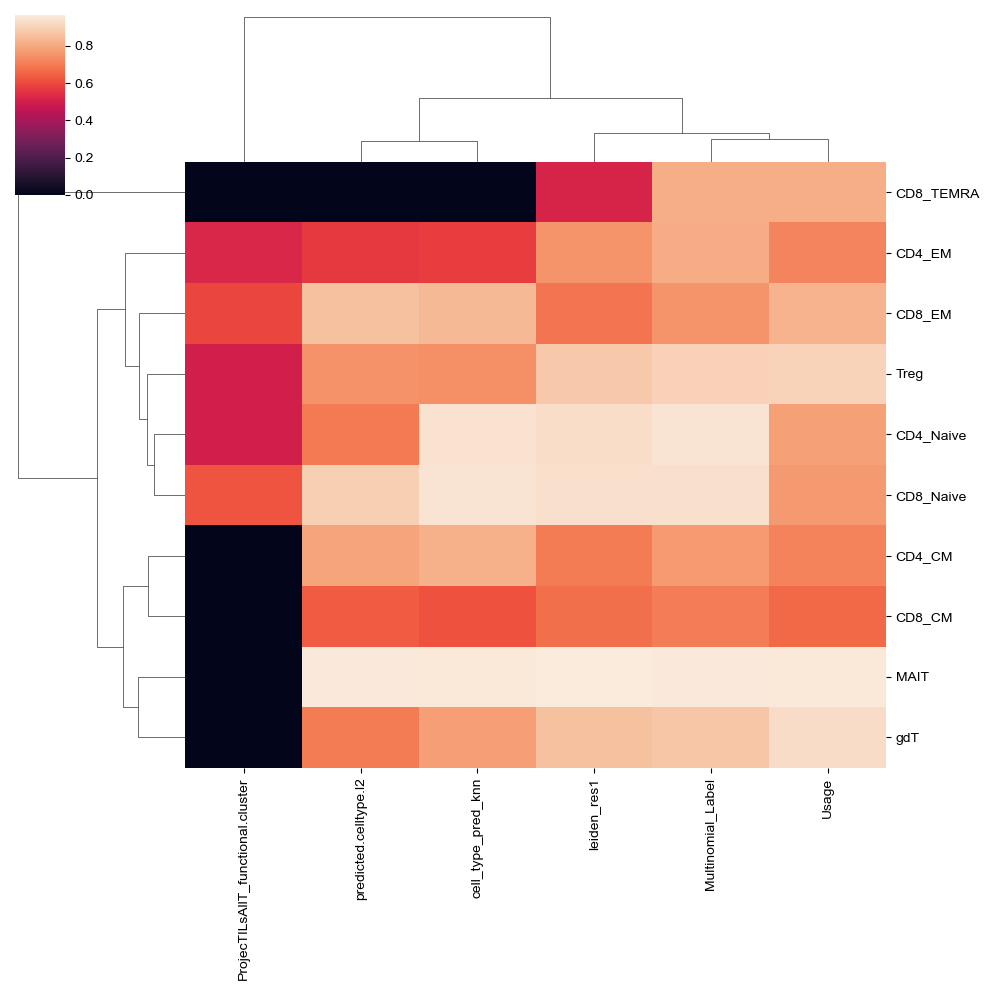

In [157]:
sns.clustermap(accuracy_all_filt)

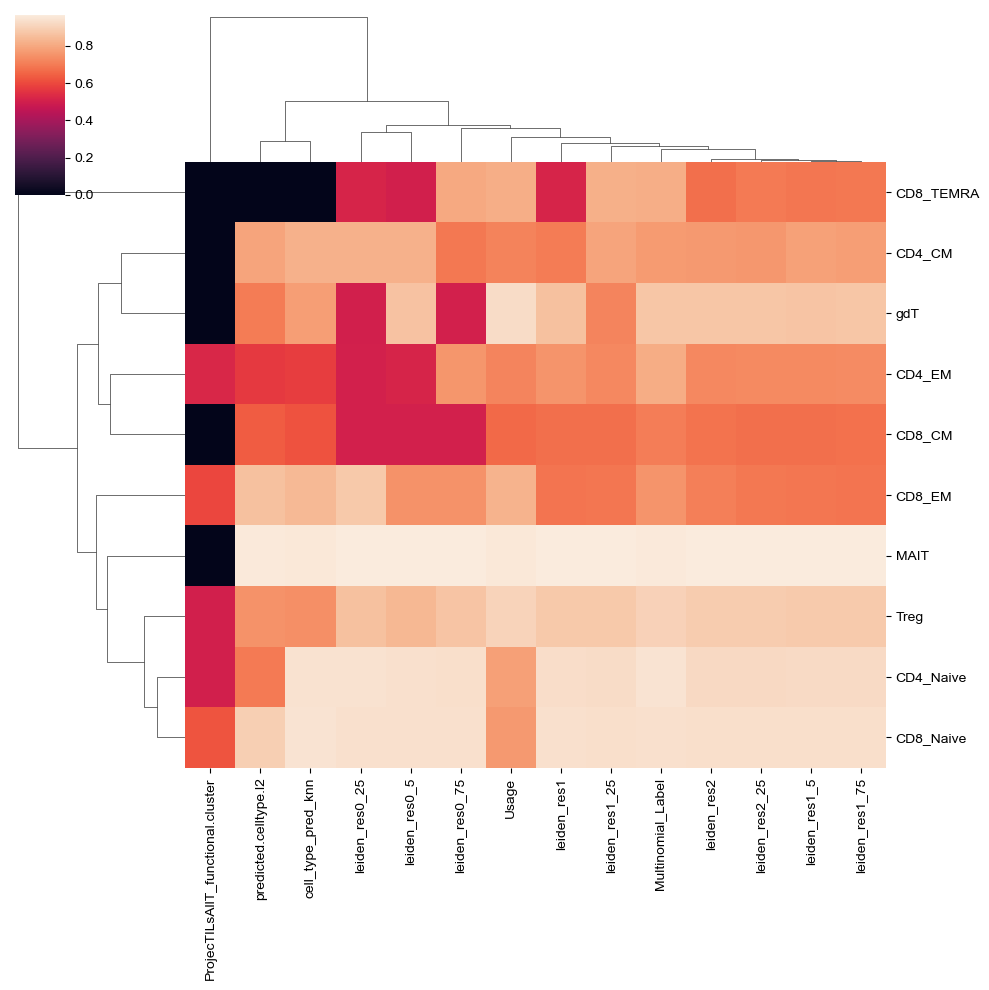

In [145]:
sns.clustermap(accuracy_all)

In [159]:
accuracy_all.to_csv('../../../Data/PerDataset/Sparks2023/Accuracy_RefMappingMethods_ByLineage.tsv', sep='\t')

# Plot ROC/AUC curves

In [73]:
len(clus_resolutions)

9

In [27]:
clus_resolutions = ['leiden_res0_25',
 'leiden_res0_5',
 'leiden_res0_75',
 'leiden_res1',
 'leiden_res1_25',
 'leiden_res1_5',
 'leiden_res1_75',
 'leiden_res2',
 'leiden_res2_25']


In [35]:
clus_resolutions

['leiden_res0_25',
 'leiden_res0_5',
 'leiden_res0_75',
 'leiden_res1',
 'leiden_res1_25',
 'leiden_res1_5',
 'leiden_res1_75',
 'leiden_res2',
 'leiden_res2_25']

In [28]:
tab20 = plt.get_cmap('tab20')

from matplotlib.colors import ListedColormap

# convert to matplotlib colormap
cmap = ListedColormap([c for n, c in enumerate(tab20.colors) if n not in [0, 1, 4, 5]], 
                      name='', N=len(clus_resolutions))


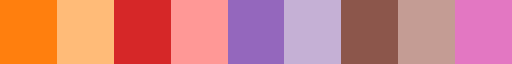

In [29]:
cmap

In [77]:
roc.head()

program       gate    type  sensitivity  specificity  threshold
0   TEMRA  CD8_TEMRA  usages     0.000000     1.000000   1.978123
1   TEMRA  CD8_TEMRA  usages     0.000059     1.000000   0.978123
2   TEMRA  CD8_TEMRA  usages     0.000059     0.999997   0.851769
3   TEMRA  CD8_TEMRA  usages     0.000118     0.999997   0.828796
4   TEMRA  CD8_TEMRA  usages     0.000118     0.999981   0.773395

In [78]:

roc_multi.head()

gate  sensitivity  specificity
0  CD4_CM     0.000000     1.000000
1  CD4_CM     0.000000     0.999996
2  CD4_CM     0.000035     0.999996
3  CD4_CM     0.000035     0.999993
4  CD4_CM     0.000142     0.999993

In [79]:
predroc_multi.head()

gate  sensitivity  specificity  accuracy
CD4_CM        CD4_CM     0.583763     0.952060  0.767912
CD4_EM        CD4_EM     0.674926     0.939272  0.807099
CD4_Naive  CD4_Naive     0.925876     0.958543  0.942209
CD8_CM        CD8_CM     0.441103     0.965093  0.703098
CD8_EM        CD8_EM     0.527026     0.979648  0.753337

In [30]:
gate_list_order = [
 'CD4_Naive',
 'CD4_CM',
 'CD4_EM',
 'Treg',
 'CD8_Naive',
'CD8_CM',
 'CD8_EM',
 'CD8_TEMRA',    
     'MAIT',
 'gdT',
                  ]

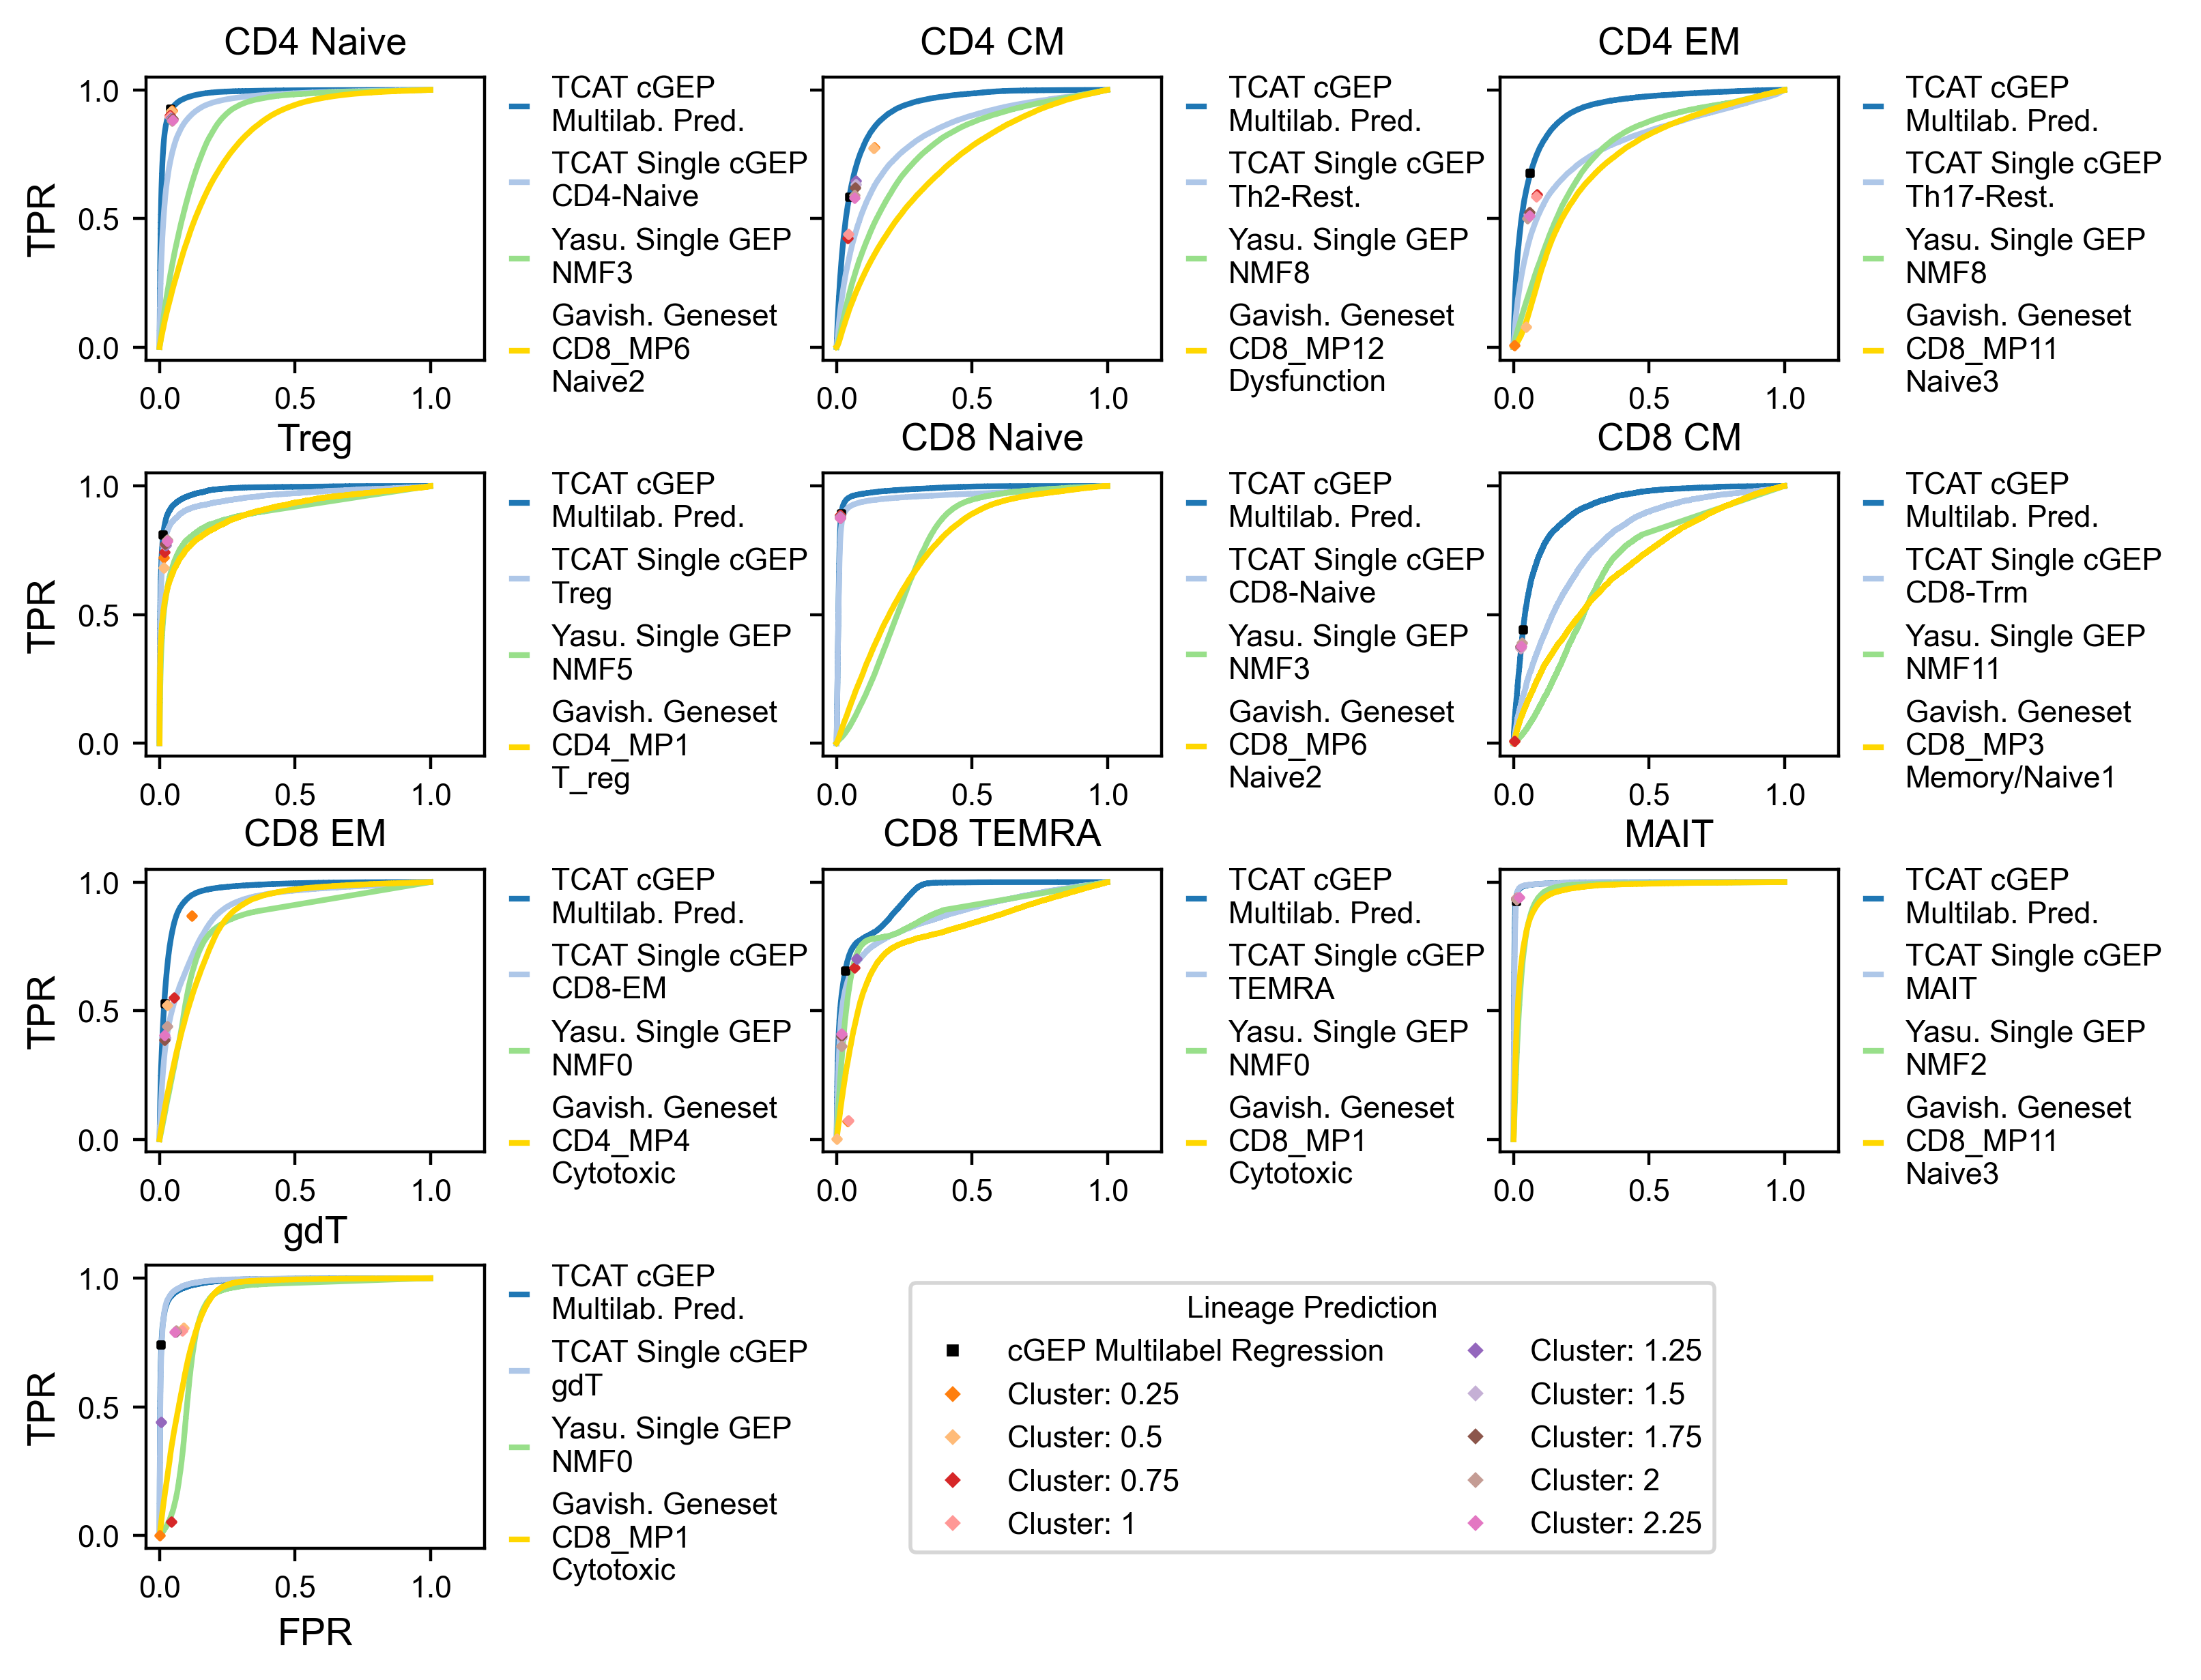

In [64]:
wspace = 1
hspace = 0.4
ncol = 3
nrow = 4
figsize = (8, 7)
tick_fontsize = 8
dpi = 400
legend_fontsize = 3
label_fontsize = 10

fig, ax = plt.subplots(nrows = nrow, ncols = ncol, 
                       gridspec_kw ={'wspace': wspace, 'hspace': hspace}, 
                       dpi = dpi, figsize = figsize, sharey=True)

for n, gate in enumerate(gate_list_order):
    # gate = prg_dict[prg][0]
    k = (n)%ncol
    j = (n)//ncol
    
    roc_yasu = yasumizu_roc
    auc_yasu = yasumizu_auc
    roc_yasu_multi = yasumizu_roc_multi
    auc_yasu_multi = yasumizu_auc_multi
    
    # print(gate, n, j, k)

    auc_labels = ['']*4 + [
            
#             ',\nAUC: %.3f' % auc_multi.loc[(auc_multi['gate']==gate), 'auc'], 
#             # ',\nAUC: %.3f' % auc_yasu_multi.loc[(auc_yasu_multi['gate']==gate), 'auc'],                               
            
#             ',\nAUC: %.3f' % auc.loc[(auc['gate']==gate) & (auc['type']=='usages'), 'auc'], 
#             ',\nAUC: %.3f' % auc_yasu.loc[(auc_yasu['gate']==gate), 'auc'],                   
#             ',\nAUC: %.3f' % gavish_auc.loc[(gavish_auc['gate']==gate), 'auc'],                   

        '', ''] + ['']*len(clus_resolutions)
    

    ax[j, k].plot(1 - roc_multi[(roc_multi['gate']==gate)]['specificity'], 
               roc_multi[(roc_multi['gate']==gate)]['sensitivity'], color= sns.color_palette("tab20")[0],
               alpha = 1, label = 'TCAT cGEP\nMultilab. Pred.', zorder = 1)
    
        
    # lab = 'Yasu. Multilab. Pred.'
    # ax[j, k].plot(1 - roc_yasu_multi[(roc_yasu_multi['gate']==gate)]['specificity'], 
    #            roc_yasu_multi[(roc_yasu_multi['gate']==gate)]['sensitivity'], 
    #            alpha = 1, color= sns.color_palette("tab20")[4],
    #             label = lab,
    #             zorder = 2)     
    
    
    gep = auc.loc[(auc['gate']==gate), 'program'].values[0]
    ax[j, k].plot(1 - roc[(roc['gate']==gate) & (roc['type']=='usages')]['specificity'], 
               roc[(roc['gate']==gate) & (roc['type']=='usages')]['sensitivity'], color=sns.color_palette("tab20")[1],
               alpha = 1, label = 'TCAT Single cGEP\n%s' % gep.replace('Resting', 'Rest.'),
                  zorder = 2)

    
    lab = 'Yasu. Single GEP\n%s' % auc_yasu.loc[(auc_yasu['gate']==gate), 'program'].values[0].split(' ')[0]
    ax[j, k].plot(1 - roc_yasu[(roc_yasu['gate']==gate) & (roc_yasu['type']=='usages')]['specificity'], 
               roc_yasu[(roc_yasu['gate']==gate) & (roc_yasu['type']=='usages')]['sensitivity'], 
               alpha = 1, color= sns.color_palette("tab20")[5],
                label = lab,
                zorder = 2)    
    
    
    lab = 'Gavish Geneset\n%s' % gavish_auc.loc[(gavish_auc['gate']==gate), 'program'].iloc[0].replace(' ', '\n')
    ax[j, k].plot(1 - gavish_roc[(gavish_roc['gate']==gate) & (gavish_roc['type']=='usages')]['specificity'], 
               gavish_roc[(gavish_roc['gate']==gate) & (gavish_roc['type']=='usages')]['sensitivity'], 
               alpha = 1, color= 'gold',
                label = lab,
                zorder = 2)       
    
    ax[j, k].scatter(1 - predroc_multi[predroc_multi['gate']==gate]['specificity'],
               predroc_multi[predroc_multi['gate']==gate]['sensitivity'], 
               alpha = 1, color = 'black', #label = 'cGEP Logistic Regression-\nPredicted Lineage',
                     s = 2, marker = 's', 
              zorder = 10)


    # ax[j, k].scatter(1 - max_identity_roc_plot[max_identity_roc_plot['gate']==gate]['specificity'],
    #            max_identity_roc_plot[max_identity_roc_plot['gate']==gate]['sensitivity'], 
    #            alpha = 1, color = 'black', label = 'Max Identity GEP', s = 2, marker = 's', 
    #           zorder = 10)

    texts=[]

    for i, rna_cluster_col in enumerate(clus_resolutions):
        rna_clus_roc_plot = rna_clus_accuracy[rna_clus_accuracy['cluster_col']==rna_cluster_col]
        
        ax[j, k].scatter(1 - rna_clus_roc_plot[rna_clus_roc_plot['gate']==gate]['specificity'],
                   rna_clus_roc_plot[rna_clus_roc_plot['gate']==gate]['sensitivity'], 
                   alpha = 1, color = cmap(i),# label = rna_cluster_col,
                         s = 2, marker = 'D', zorder = 10)
        
    # if gate != 'CD8_CM':
    auc_legend = ax[j, k].legend(handlelength=0.5,
                                 fontsize = tick_fontsize, labels = ["{}{}".format(a, b) for a, b in 
              zip(ax[j, k].get_legend_handles_labels()[1], auc_labels)], frameon=False, bbox_to_anchor=(1,1.1))
    # else:
    #      auc_legend = ax[j, k].legend(handlelength=0.5,
    #                                   fontsize = tick_fontsize, labels = ["{}{}".format(a, b) for a, b in 
    #               zip(ax[j, k].get_legend_handles_labels()[1], auc_labels)], frameon=False, bbox_to_anchor=(1,1))       
                                 
    ax[j, k].tick_params('both', labelsize=tick_fontsize)
    ax[j,k].set_xlim([-.05, 1.2])

    
    if k==0:
        ax[j, k].set_ylabel('TPR', fontsize = label_fontsize)
    if j==nrow-1:
        ax[j, k].set_xlabel('FPR', fontsize = label_fontsize)
    
    ax[j, k].set_title(gate.replace('_', ' '), fontsize = label_fontsize)#, y = 1.05)
    # ax[j, k].text(x = .1, y = 0.03, #1.03, 
    #               s = ''.join(['Regression Variables:\n',
    #                            roc_steplog[(roc_steplog['gate']==gate)]['features_renamed'].unique()[0].replace(',', ', ')]), 
    #               transform=ax[j, k].transAxes, fontsize = 4)

handles = [plt.plot([],[], color='black', marker="s", ms=2, ls="")[0]]
handles += [plt.plot([],[], color=cmap(i), marker="D", ms=2, ls="")[0] for (i, rna_cluster_col) in enumerate(clus_resolutions)]
ax[j, k+1].remove()
ax[j, k+2].remove()
cluster_legend = plt.legend(handles = handles, 
        labels = ['cGEP Multilabel Regression'] 
                            + ['Cluster: %s' % res.split('res')[1].replace('_', '.') for res in clus_resolutions],                            
          bbox_to_anchor=(.85, .1, #0.9125,
                          0, 0.15), bbox_transform=plt.gcf().transFigure, 
           loc='lower right', fontsize = tick_fontsize, ncol = 2, title = 'Lineage Prediction',
                           title_fontsize = tick_fontsize)

ax[j, k].add_artist(auc_legend)
plt.savefig(os.path.join(figdir, 'SparksROCCurve_withYasumizu.png'), bbox_inches="tight")
plt.savefig(os.path.join(figdir, 'SparksROCCurve_withYasumizu.pdf'), bbox_inches="tight")

In [84]:
cmap = plt.get_cmap('tab20_r', len(clus_resolutions)+6)

for i, rna_cluster_col in enumerate(clus_resolutions):
    print(cmap(i))

(0.6196078431372549, 0.8549019607843137, 0.8980392156862745, 1.0)
(0.09019607843137255, 0.7450980392156863, 0.8117647058823529, 1.0)
(0.8588235294117647, 0.8588235294117647, 0.5529411764705883, 1.0)
(0.7803921568627451, 0.7803921568627451, 0.7803921568627451, 1.0)
(0.4980392156862745, 0.4980392156862745, 0.4980392156862745, 1.0)
(0.8901960784313725, 0.4666666666666667, 0.7607843137254902, 1.0)
(0.7686274509803922, 0.611764705882353, 0.5803921568627451, 1.0)
(0.7725490196078432, 0.6901960784313725, 0.8352941176470589, 1.0)
(0.5803921568627451, 0.403921568627451, 0.7411764705882353, 1.0)


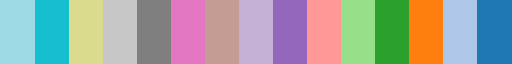

In [85]:
cmap

In [86]:
gate_list

['CD8_TEMRA',
 'gdT',
 'CD8_Naive',
 'Treg',
 'CD8_EM',
 'CD4_EM',
 'CD4_Naive',
 'CD4_CM',
 'MAIT',
 'CD8_CM']

# Plot AUC/ROC summary stats

## AUC barplots

In [138]:
auc['label']='TCAT Single cGEP'
auc_multi['label'] = 'TCAT cGEP Multilabel Prediction'

In [72]:
auc

program       gate    type       auc             label
0         TEMRA  CD8_TEMRA  usages  0.867251  TCAT Single cGEP
1           gdT        gdT  usages  0.986851  TCAT Single cGEP
2     CD8-Naive  CD8_Naive  usages  0.960151  TCAT Single cGEP
3          Treg       Treg  usages  0.954664  TCAT Single cGEP
4        CD8-EM     CD8_EM  usages  0.896949  TCAT Single cGEP
5  Th17-Resting     CD4_EM  usages  0.787439  TCAT Single cGEP
6     CD4-Naive  CD4_Naive  usages  0.952606  TCAT Single cGEP
7   Th2-Resting     CD4_CM  usages  0.823162  TCAT Single cGEP
8          MAIT       MAIT  usages  0.993953  TCAT Single cGEP
9       CD8-Trm     CD8_CM  usages  0.789419  TCAT Single cGEP

In [140]:
auc_all = pd.concat([
                     auc_multi[['gate', 'auc', 'label']],
                    auc[['gate', 'auc', 'label']]
                    ])
# auc_all['label'] = auc_all['label'].replace({'cGEP Logistic\nRegression':'TCAT Multilabel\nPrediction'})
# auc_all.index = auc_all['type']

gate_order = auc_all.groupby('gate').mean()['auc'].sort_values(ascending = False).index

In [149]:
tick_fontsize = 8
label_fontsize =10

auc_all = pd.concat([auc_multi[['gate', 'auc', 'label']],
                    auc[['gate', 'auc', 'label']]
                    ])
auc_all['label'] = auc_all['label'].replace({'TCAT cGEP Multilabel Prediction':
                                             'TCAT cGEP\nMultilabel Pred.'})
auc_all['label'] = auc_all['label'].replace({'TCAT Single cGEP':
                                             'TCAT Single\ncGEP'})

x = yasumizu_auc[['gate', 'auc']]
x['label'] = 'Yasumizu et. al.\nSingle GEP'
# y = yasumizu_auc_multi
# y['label'] = 'Yasumizu et. al.\nMultilabel Pred.'
z = gavish_auc
z['label'] = 'Gavish et. al.\nGeneset Pred.'

auc_all = pd.concat([auc_all, #y, 
                     x, z], axis=0)

[(0.12156862745098039, 0.4666666666666667, 0.7058823529411765),
 (0.6823529411764706, 0.7803921568627451, 0.9098039215686274),
 (1.0, 0.4980392156862745, 0.054901960784313725),
 (1.0, 0.7333333333333333, 0.47058823529411764),
 (0.17254901960784313, 0.6274509803921569, 0.17254901960784313),
 (0.596078431372549, 0.8745098039215686, 0.5411764705882353),
 (0.8392156862745098, 0.15294117647058825, 0.1568627450980392),
 (1.0, 0.596078431372549, 0.5882352941176471),
 (0.5803921568627451, 0.403921568627451, 0.7411764705882353),
 (0.7725490196078432, 0.6901960784313725, 0.8352941176470589),
 (0.5490196078431373, 0.33725490196078434, 0.29411764705882354),
 (0.7686274509803922, 0.611764705882353, 0.5803921568627451),
 (0.8901960784313725, 0.4666666666666667, 0.7607843137254902),
 (0.9686274509803922, 0.7137254901960784, 0.8235294117647058),
 (0.4980392156862745, 0.4980392156862745, 0.4980392156862745),
 (0.7803921568627451, 0.7803921568627451, 0.7803921568627451),
 (0.7372549019607844, 0.7411764705882353, 0.13333333333333333),
 (0.8588235294117647, 0.8588235294117647, 0.5529411764705883),
 (0.09019607843137255, 0.7450980392156863, 0.8117647058823529),
 (0.6196078431372549, 0.8549019607843137, 0.8980392156862745)]

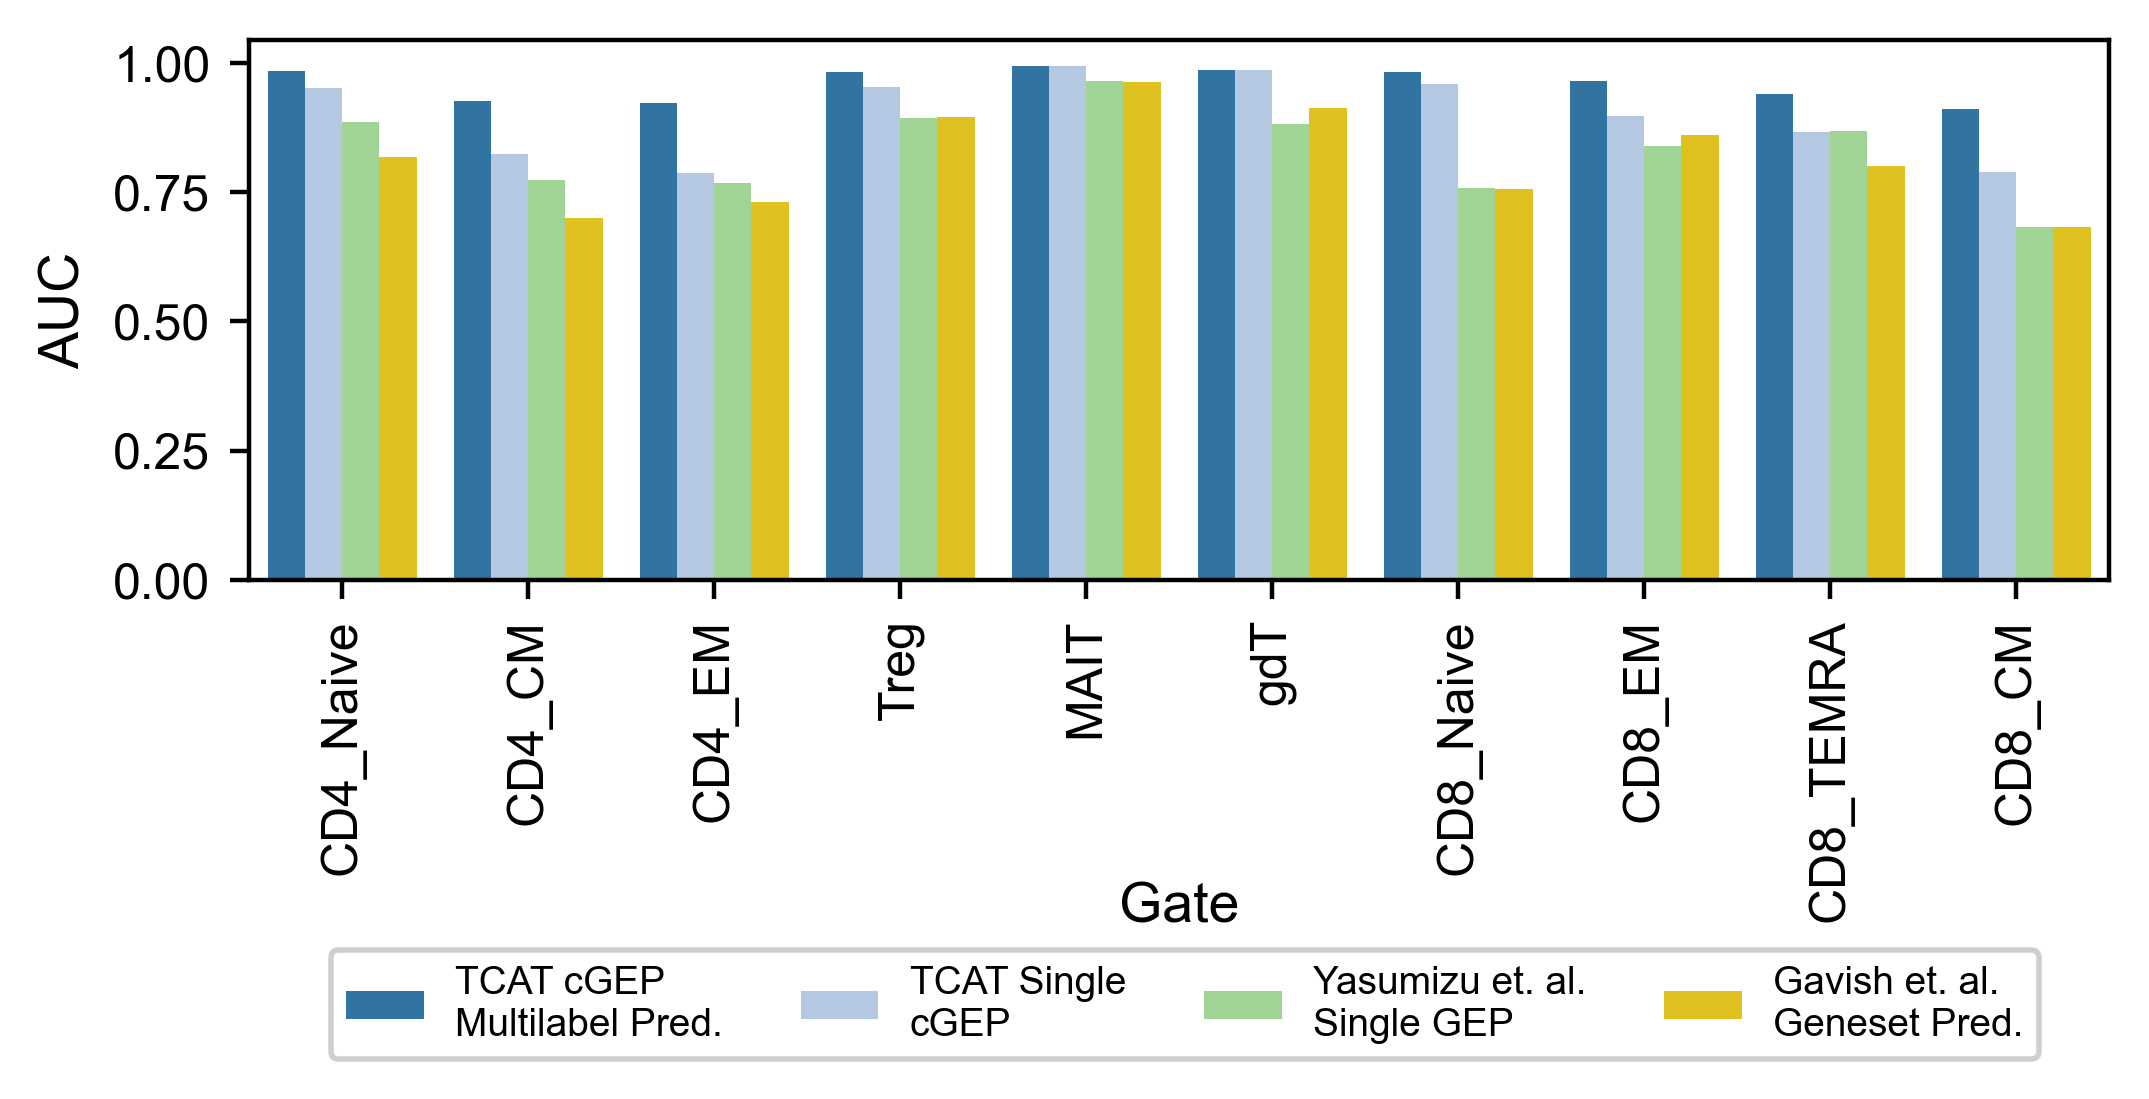

In [158]:
gate_order_new = [ 'CD4_Naive', 'CD4_CM', 'CD4_EM', 'Treg',
                  'MAIT', 'gdT', 'CD8_Naive', 'CD8_EM', 'CD8_TEMRA', 'CD8_CM']

fig, ax = plt.subplots(figsize = (6,3), dpi = 400, gridspec_kw={'bottom':.5, 'top':.95})
sns.barplot(data=auc_all, x='gate', y='auc', hue='label', order =gate_order_new,
            ax = ax, palette = np.array(sns.color_palette("tab20"))[[0, 1, 5]].tolist() + ['gold'])
ax.legend(#loc = 'lower right',
          fontsize = 7, #fancybox=True, 
          framealpha = .925,
    bbox_to_anchor=(.9725, -.65), ncol=4
)
ax.set_xlabel('Gate', labelpad=-7,)
ax.set_ylabel('AUC')

ax.tick_params(axis = 'x', rotation = 90)
ax.tick_params(axis = 'both', labelsize = 9)

plt.savefig(os.path.join(figdir, 'AUCBarplot_SparksGating_Yasumizu.png'))
plt.savefig(os.path.join(figdir, 'AUCBarplot_SparksGating_Yasumizu.pdf'))

## Accuracy barplots

In [39]:
accuracy_multi = pd.read_csv('../../../Data/PerDataset/Sparks2023/Accuracy_RefMappingMethods_All.tsv', index_col = 0, sep='\t')


In [40]:
acc_label_map = {'Multinomial_Label' : 'TCAT Multilabel', 
                'predicted.celltype.l2' : 'Azimuth',
                'cell_type_pred_knn' : 'Symphony',
                'ProjecTILsAllT_functional.cluster' : 'ProjecTILs',
                 'leiden_res1' : 'RNA Cluster',
                 # 'Usage' : 'TCAT Single cGEP'
                }

accuracy_multi['label'] = accuracy_multi['name'].replace(acc_label_map)

In [133]:
accuracy_multi.sort_values('value').label

ProjecTILsAllT_functional.cluster         ProjecTILs
predicted.celltype.l2                        Azimuth
leiden_res0_25                        leiden_res0_25
leiden_res0_5                          leiden_res0_5
cell_type_pred_knn                          Symphony
leiden_res0_75                        leiden_res0_75
leiden_res1                              RNA Cluster
leiden_res1_25                        leiden_res1_25
leiden_res2_25                        leiden_res2_25
leiden_res2                              leiden_res2
leiden_res1_5                          leiden_res1_5
leiden_res1_75                        leiden_res1_75
Multinomial_Label                    TCAT Multilabel
Name: label, dtype: object

In [138]:
accuracy_multi[-accuracy_multi['label'].str.startswith('leiden')]

value  \
Multinomial_Label                  0.717929   
predicted.celltype.l2              0.516959   
cell_type_pred_knn                 0.575012   
ProjecTILsAllT_functional.cluster  0.126952   
leiden_res1                        0.614759   

                                                                name  \
Multinomial_Label                                  Multinomial_Label   
predicted.celltype.l2                          predicted.celltype.l2   
cell_type_pred_knn                                cell_type_pred_knn   
ProjecTILsAllT_functional.cluster  ProjecTILsAllT_functional.cluster   
leiden_res1                                              leiden_res1   

                                             label  
Multinomial_Label                  TCAT Multilabel  
predicted.celltype.l2                      Azimuth  
cell_type_pred_knn                        Symphony  
ProjecTILsAllT_functional.cluster       ProjecTILs  
leiden_res1                            RNA Cluster

/tmp/ipykernel_248340/2637333735.py:7: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation = 45, ha = 'right', rotation_mode = 'anchor')


Text(0, 0.5, 'Balanced\nAccuracy')

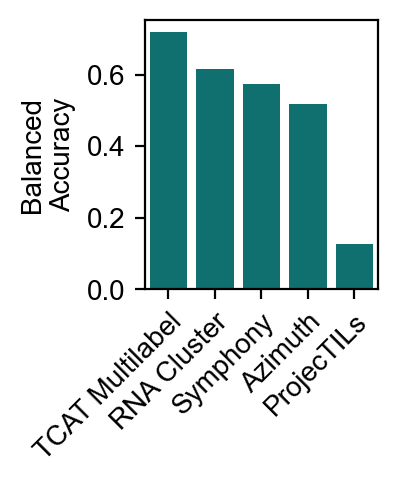

In [139]:
dat = accuracy_multi[-accuracy_multi['label'].str.startswith('leiden')]
fig, ax = plt.subplots(dpi = 200, figsize = (1.5, 1.75))
sns.barplot(data=dat, x='label', y='value', color = 'teal',
            order = dat.sort_values('value', ascending = False).label,
            ax = ax#, palette = sns.color_palette("husl", 7)
           )
ax.set_xticklabels(ax.get_xticklabels(), rotation = 45, ha = 'right', rotation_mode = 'anchor')
ax.set_xlabel('')
ax.set_ylabel('Balanced\nAccuracy')
# ax.legend(title = '', bbox_to_anchor=(1, 1))

# plt.savefig(os.path.join(figdir, 'Revision_LineageAccuracy_Sparks.png'), bbox_inches="tight")
# plt.savefig(os.path.join(figdir, 'Revision_LineageAccuracy_Sparks.pdf'), bbox_inches="tight")

In [41]:
accuracy_all = pd.read_csv('../../../Data/PerDataset/Sparks2023/Accuracy_RefMappingMethods_ByLineage.tsv', index_col = 0, sep='\t')

In [42]:
accuracy_all

Multinomial_Label  predicted.celltype.l2  cell_type_pred_knn  \
CD4_Naive           0.942706               0.696565            0.938410   
CD4_CM              0.768335               0.790650            0.820518   
CD8_EM              0.753479               0.857973            0.840040   
CD4_EM              0.807884               0.566752            0.575639   
Treg                0.898073               0.747799            0.738933   
CD8_TEMRA           0.810508               0.000000            0.000000   
CD8_Naive           0.936990               0.889821            0.943379   
MAIT                0.958588               0.957947            0.955853   
gdT                 0.867668               0.697274            0.775287   
CD8_CM              0.703254               0.633672            0.617254   

           ProjecTILsAllT_functional.cluster     Usage  leiden_res0_25  \
CD4_Naive                           0.499153  0.777605        0.938464   
CD4_CM                              0.000000  0.713626        0.819479   
CD8_EM                              0.591714  0.821379        0.875953   
CD4_EM                              0.522425  0.716981        0.502705   
Treg                                0.500000  0.902363        0.856195   
CD8_TEMRA                           0.000000  0.810162        0.514506   
CD8_Naive                           0.618377  0.761578        0.936454   
MAIT                                0.000000  0.954492        0.963582   
gdT                                 0.000000  0.925630        0.499994   
CD8_CM                              0.000000  0.661773        0.502595   

           leiden_res0_5  leiden_res0_75  leiden_res1  leiden_res1_25  \
CD4_Naive       0.937069        0.931980     0.929748        0.924449   
CD4_CM          0.820061        0.691114     0.697862        0.788396   
CD8_EM          0.747158        0.749097     0.684835        0.687020   
CD4_EM          0.516152        0.754733     0.753306        0.726855   
Treg            0.835731        0.865807     0.877474        0.877249   
CD8_TEMRA       0.500052        0.801125     0.514899        0.815311   
CD8_Naive       0.936924        0.936847     0.934686        0.933649   
MAIT            0.964477        0.963824     0.964522        0.962593   
gdT             0.859366        0.504590     0.855373        0.718205   
CD8_CM          0.502642        0.502523     0.670923        0.673113   

           leiden_res1_5  leiden_res1_75  leiden_res2  leiden_res2_25  
CD4_Naive       0.922280        0.920968     0.917589        0.916668  
CD4_CM          0.782459        0.775657     0.763531        0.757980  
CD8_EM          0.686398        0.684326     0.705025        0.693063  
CD4_EM          0.729553        0.733025     0.725168        0.728073  
Treg            0.878463        0.879814     0.884193        0.881691  
CD8_TEMRA       0.689323        0.692395     0.673430        0.696799  
CD8_Naive       0.932874        0.932074     0.931544        0.931136  
MAIT            0.962561        0.962163     0.961698        0.961124  
gdT             0.866253        0.866806     0.867987        0.867217  
CD8_CM          0.672820        0.675677     0.680512        0.673971

In [44]:
tick_fontsize = 8
label_fontsize =10

In [45]:
accuracy_plot = accuracy_all.unstack().reset_index()
accuracy_plot.columns = ['name', 'gate', 'value']

In [46]:
acc_label_map = {'Multinomial_Label' : 'TCAT Multilabel', 
                'predicted.celltype.l2' : 'Azimuth',
                'cell_type_pred_knn' : 'Symphony',
                'ProjecTILsAllT_functional.cluster' : 'ProjecTILs',
                 # 'leiden_res1' : 'RNA Cluster',
                 'Usage' : 'TCAT Single cGEP'
                }

accuracy_plot['label'] = accuracy_plot['name'].replace(acc_label_map)
accuracy_plot['label'] = accuracy_plot['label'].str.replace('leiden_', 'RNA Cluster ')

In [163]:
fontsize = label_fontsize

In [164]:
tab20 = plt.get_cmap('tab20')

from matplotlib.colors import ListedColormap

# convert to matplotlib colormap
cmap = ListedColormap([c for n, c in enumerate(tab20.colors) if n not in [0, 1, 4, 5]], 
                      name='', N=len(clus_resolutions))


In [173]:
clus_pal = {clus: cmap(n) for n, clus in enumerate(clus_resolutions)}

clus_pal['Multinomial_Label'] = tab20(0)
clus_pal['Usage'] = tab20(1)

clus_pal['predicted.celltype.l2'] = tab20(18)
clus_pal['cell_type_pred_knn'] = 'seagreen'
clus_pal['ProjecTILsAllT_functional.cluster'] = 'darkgray'

In [47]:
accuracy_plot_relab = accuracy_plot.copy()
ind = accuracy_plot_relab['label'].apply(lambda x: 'res' in x)
accuracy_plot_relab.loc[ind, 'label'] = 'Cluster: ' + accuracy_plot_relab.loc[ind, 'label'].apply(lambda x: x.split('res')[1].replace('_', '.'))
accuracy_plot_relab['label'].unique()

accuracy_plot_relab['gate_rename'] = accuracy_plot_relab['gate'].apply(lambda x: x.replace('_', ' '))

clus_pal_relabel = dict(zip(pd.Series(clus_pal.keys()).map(dict(zip(accuracy_plot_relab['name'], accuracy_plot_relab['label']))),
                                               clus_pal.values()))

gate_order = ['MAIT', 'gdT', 'CD8_Naive', 'Treg', 'CD4_Naive', 'CD8_EM', 'CD8_TEMRA',
       'CD4_CM', 'CD4_EM', 'CD8_CM']

hue_order = ['TCAT Multilabel', 'TCAT Single cGEP', 'Azimuth', 'Symphony', 'ProjecTILs',
       'Cluster: 0.25', 'Cluster: 0.5',
       'Cluster: 0.75', 'Cluster: 1', 'Cluster: 1.25', 'Cluster: 1.5',
       'Cluster: 1.75', 'Cluster: 2', 'Cluster: 2.25']

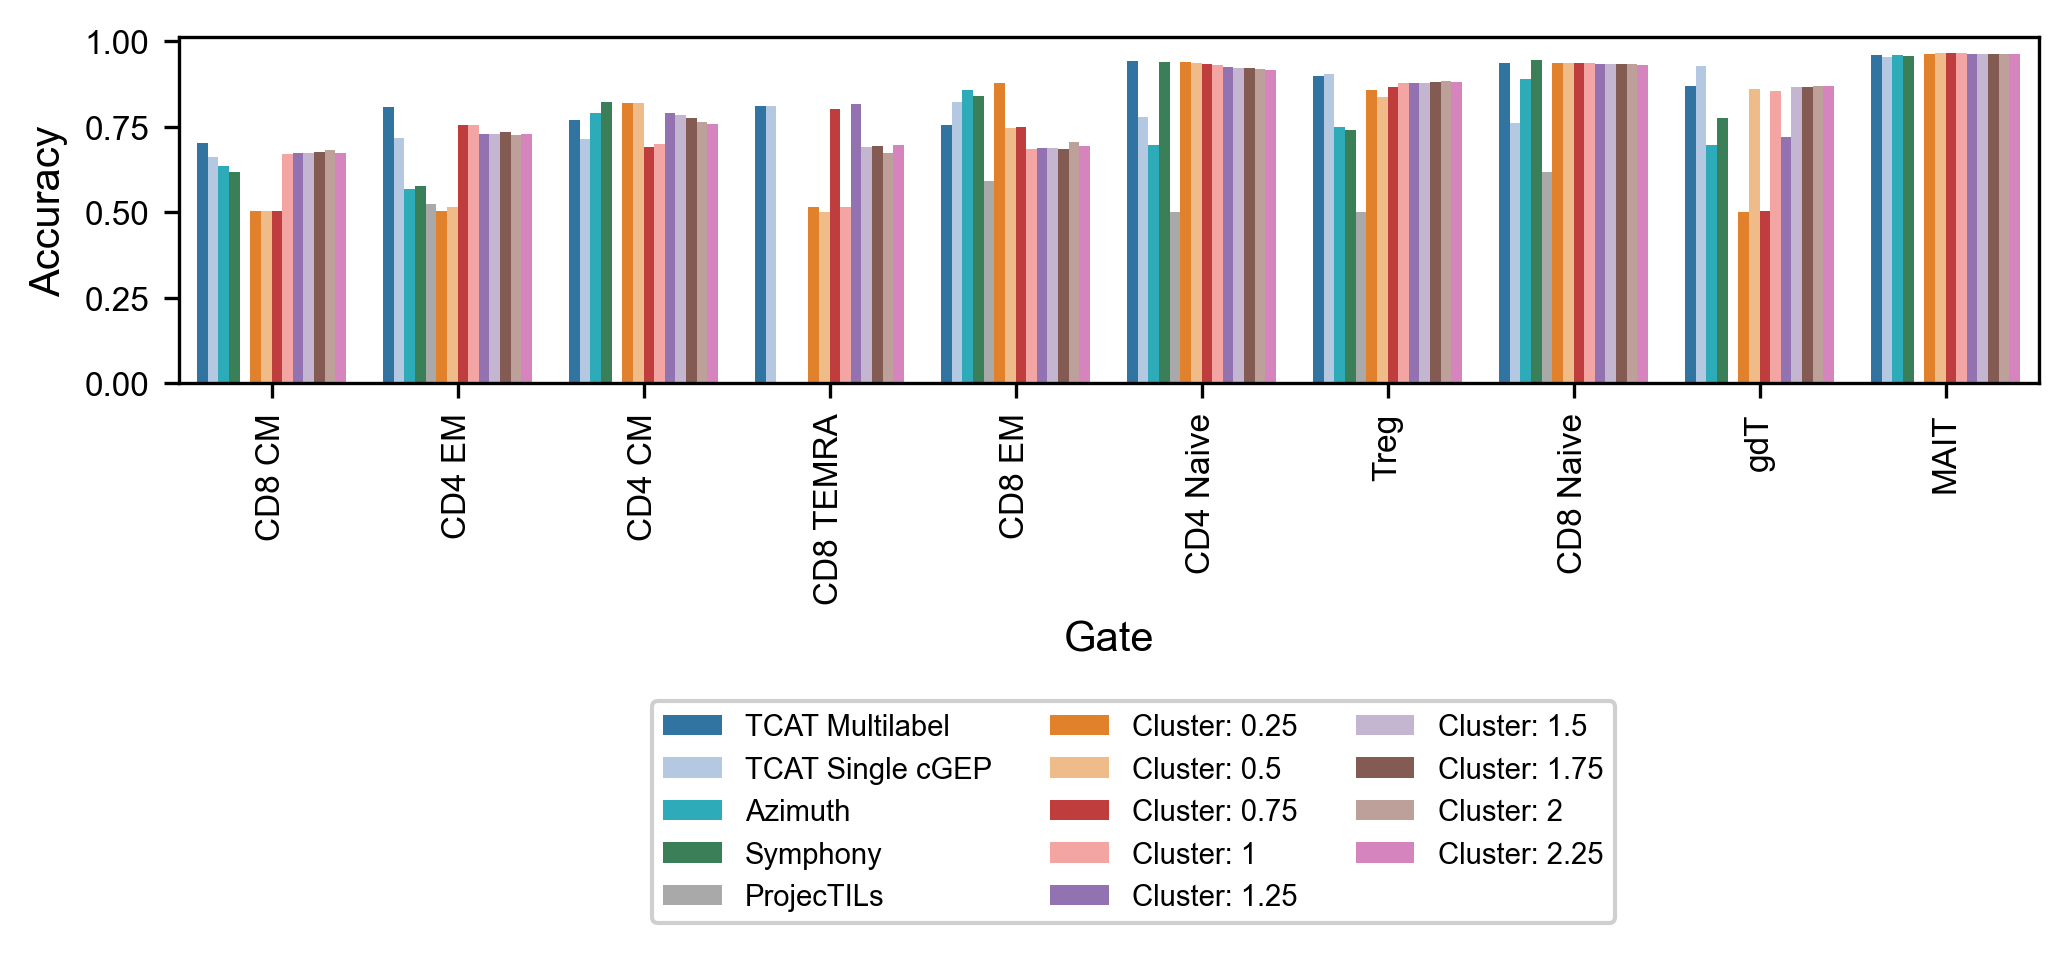

In [180]:
label_fontsize = 10
tick_fontsize=8
fig, ax = plt.subplots(figsize = (8, 1.5), dpi = 300)
sns.barplot(data=accuracy_plot_relab, x='gate_rename', y='value', hue='label', 
            hue_order = hue_order,
            order =list([x.replace('_', ' ') for x in reversed(gate_order)]),
            ax = ax, palette= clus_pal_relabel)
ax.legend(loc = 'lower right',fontsize = 7, #fancybox=True, 
          framealpha = .925, 
    bbox_to_anchor=(.78, -1.6),
          ncol = 3
)
ax.tick_params(axis = 'x', rotation = 90)
ax.tick_params('both', labelsize = tick_fontsize)
ax.set_xlabel('Gate', fontsize = label_fontsize)
ax.set_ylabel('Accuracy', fontsize = label_fontsize)

plt.savefig(os.path.join(figdir, 'AccuracyBarplot_SparksGating.png'), bbox_inches="tight")
plt.savefig(os.path.join(figdir, 'AccuracyBarplot_SparksGating.pdf'), bbox_inches="tight")

In [59]:
accuracy_all[clus_resolutions].mean(axis = 0)

leiden_res0_25    0.740993
leiden_res0_5     0.761963
leiden_res0_75    0.770164
leiden_res1       0.788363
leiden_res1_25    0.810684
leiden_res1_5     0.812298
leiden_res1_75    0.812291
leiden_res2       0.811068
leiden_res2_25    0.810772
dtype: float64

In [62]:
accuracy_all.loc[gate, 'Multinomial_Label'] - accuracy_all.loc[gate, clus_resolutions].mean(axis = 0)

0.1003582454742401

In [68]:
for gate in gate_list:
    print(gate)
    
    multi_rna = accuracy_all.loc[gate, 'Multinomial_Label'] - accuracy_all.loc[gate, clus_resolutions].mean(axis = 0)
    
    print('Multinomial - RNA Clustering Accuracy: %.3f' % multi_rna)
    
    print()

gdT
Multinomial - RNA Clustering Accuracy: 0.100

CD4_EM
Multinomial - RNA Clustering Accuracy: 0.122

MAIT
Multinomial - RNA Clustering Accuracy: -0.004

CD4_CM
Multinomial - RNA Clustering Accuracy: 0.002

CD8_CM
Multinomial - RNA Clustering Accuracy: 0.086

CD8_Naive
Multinomial - RNA Clustering Accuracy: 0.003

CD4_Naive
Multinomial - RNA Clustering Accuracy: 0.016

Treg
Multinomial - RNA Clustering Accuracy: 0.027

CD8_TEMRA
Multinomial - RNA Clustering Accuracy: 0.155

CD8_EM
Multinomial - RNA Clustering Accuracy: 0.030



In [73]:
for cluster_col in clus_resolutions:
    print(cluster_col)
    multi_rna = (accuracy_all.loc[:, 'Multinomial_Label'] - accuracy_all.loc[:, cluster_col]).mean()
    print('Multinomial - RNA Clustering Accuracy: %.3f' % multi_rna)
    
    print()

leiden_res0_25
Multinomial - RNA Clustering Accuracy: 0.104

leiden_res0_5
Multinomial - RNA Clustering Accuracy: 0.083

leiden_res0_75
Multinomial - RNA Clustering Accuracy: 0.075

leiden_res1
Multinomial - RNA Clustering Accuracy: 0.056

leiden_res1_25
Multinomial - RNA Clustering Accuracy: 0.034

leiden_res1_5
Multinomial - RNA Clustering Accuracy: 0.032

leiden_res1_75
Multinomial - RNA Clustering Accuracy: 0.032

leiden_res2
Multinomial - RNA Clustering Accuracy: 0.034

leiden_res2_25
Multinomial - RNA Clustering Accuracy: 0.034



# Plot UMAP comparisons

In [31]:
usage_thresh = 0.025
adata_RNA = sc.read(paths['RNA_LogTP10K_Varnorm_Harmony'])
rna_cluster_col = 'leiden_res1'

# Subset to cells in the gates of interest only
ind = list(set(meta_test.index).intersection(usage_test.index).intersection(adata_RNA.obs.index).intersection(comp_all.index))
umap = pd.DataFrame(adata_RNA.obsm['X_harmony_RNA_UMAP'], index = adata_RNA.obs.index,
                   columns = ['UMAP1', 'UMAP2'])
umap = umap.loc[ind, :]

gates_to_plot = gate_list#['Treg', 'CD8_EM']

In [76]:
gates_to_plot

['Treg',
 'CD8_CM',
 'CD4_CM',
 'CD4_EM',
 'CD8_EM',
 'MAIT',
 'CD8_TEMRA',
 'gdT',
 'CD8_Naive',
 'CD4_Naive']

In [37]:
adata_RNA.obs['cell_gating'] = meta.loc[adata_RNA.obs.index, 'cell_gating'].apply(lambda x: x.replace('_', ' '))

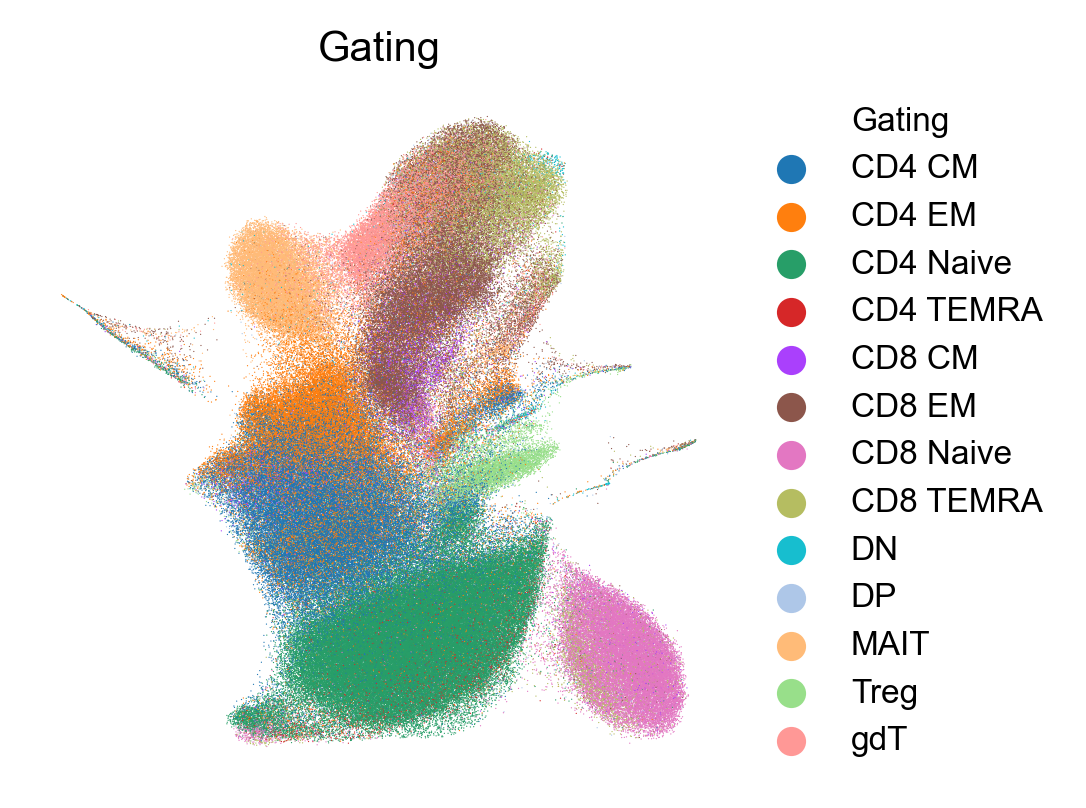

In [30]:
with plt.rc_context({'figure.dpi' : 300, 'figure.figsize' : (3, 3), 'legend.fontsize': tick_fontsize}):
    fig = sc.pl.umap(adata_RNA, color =  'cell_gating', return_fig = True, frameon = False,
                    legend_fontsize = tick_fontsize)
    ax = fig.get_axes()
    ax[0].set_title('Gating', fontsize = label_fontsize)
    
    legend = ax[0].get_legend()
    legend.set_title('Gating',  prop={'size':  tick_fontsize})
    
    # fig.savefig(os.path.join(figdir, 'SparksUMAP.AllGating.png'), bbox_inches="tight")
    # fig.savefig(os.path.join(figdir, 'SparksUMAP.AllGating.pdf'), bbox_inches="tight")
    


In [38]:
gating_cmap = {'CD4 CM': '#1f77b4',
 'CD4 EM': '#ff7f0e',
 'CD4 Naive': '#279e68',
 'CD4 TEMRA': '#d62728',
 'CD8 CM': '#aa40fc',
 'CD8 EM': '#8c564b',
 'CD8 Naive': '#e377c2',
 'CD8 TEMRA': '#b5bd61',
 'DN': '#17becf',
 'DP': '#aec7e8',
 'MAIT': '#ffbb78',
 'Treg': '#98df8a',
 'gdT': '#ff9896'}


In [39]:
pastel_cmap_dict = {
    'CD4 CM': '#4fa3e1',  # Brighter blue
    'CD4 EM': '#ff9e1a',  # Brighter orange
    'CD4 Naive': '#00997d',  # Brighter green
    'CD4 TEMRA': '#e65b5f',  # Brighter red
    'CD8 CM': '#c56bff',  # Brighter purple
    'CD8 EM': '#b29170',  # Brighter brown
    'CD8 Naive': '#e9aaff',  # Brighter pink
    'CD8 TEMRA': '#ffe59a',  # Brighter olive green
    'DN': '#6bd7e5',  # Brighter cyan
    'DP': '#b4c8f2',  # Brighter light blue
    'MAIT': '#ffd39b',  # Brighter peach
    'Treg': '#94c47d',  # Brighter light green
    'gdT': '#fdb4b2',  # Brighter light red
}

In [40]:
ind_multi = pred_multi.index
adata_RNA_multi = adata_RNA[ind_multi, ].copy()
adata_RNA_multi.obs.loc[pred_multi.index, 'Multinomial_Label'] = pred_multi['0'].apply(lambda x: x.replace('_', ' '))

adata_RNA_multi.obs['Multinomial_Label'] = adata_RNA_multi.obs['Multinomial_Label'].astype('category')
adata_RNA_multi.uns['Multinomial_Label_colors'] = [gating_cmap[key] for key in adata_RNA_multi.obs['Multinomial_Label'].cat.categories]

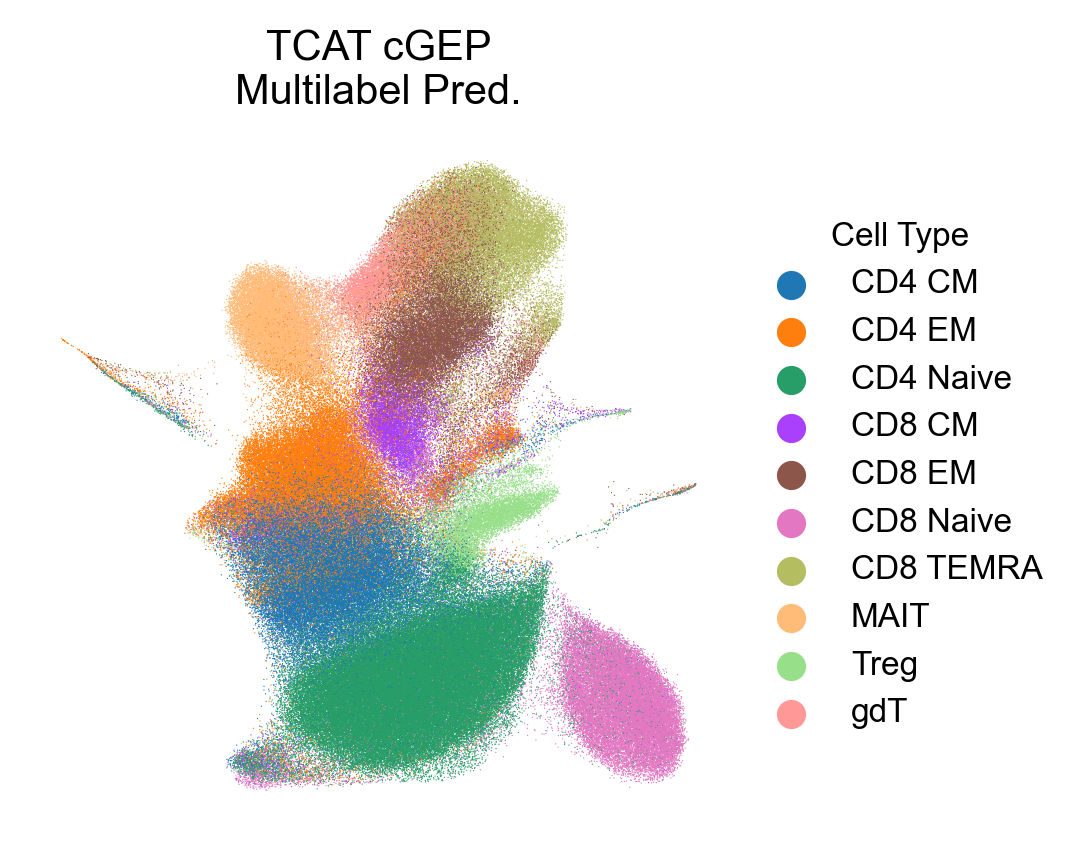

In [40]:
with plt.rc_context({'figure.dpi' : 300, 'figure.figsize' : (3, 3), 'legend.fontsize': tick_fontsize}):
    fig = sc.pl.umap(adata_RNA_multi, color =  'Multinomial_Label', return_fig = True, frameon = False,
                    legend_fontsize = tick_fontsize)
    ax = fig.get_axes()
    ax[0].set_title('TCAT cGEP\nMultilabel Pred.', fontsize = label_fontsize)
    
    legend = ax[0].get_legend()
    legend.set_title('Lineage',  prop={'size':  tick_fontsize})
    
    # fig.savefig(os.path.join(figdir, 'SparksUMAP.MultinomialLabels.png'), bbox_inches="tight")
    # fig.savefig(os.path.join(figdir, 'SparksUMAP.MultinomialLabels.pdf'), bbox_inches="tight")
    


In [ ]:
adata_RNA_multi.uns['Multinomial_Label_colors'] = [pastel_cmap_dict[key] for key in adata_RNA_multi.obs['Multinomial_Label'].cat.categories]



In [43]:
adata_RNA.obs['cell_gating'] = adata_RNA.obs['cell_gating'].astype('category')
adata_RNA.uns['cell_gating_colors'] = [pastel_cmap_dict[key] if (key in pastel_cmap_dict.keys()) else gating_cmap[key]
                                       for key in adata_RNA.obs['cell_gating'].cat.categories
                                      ]

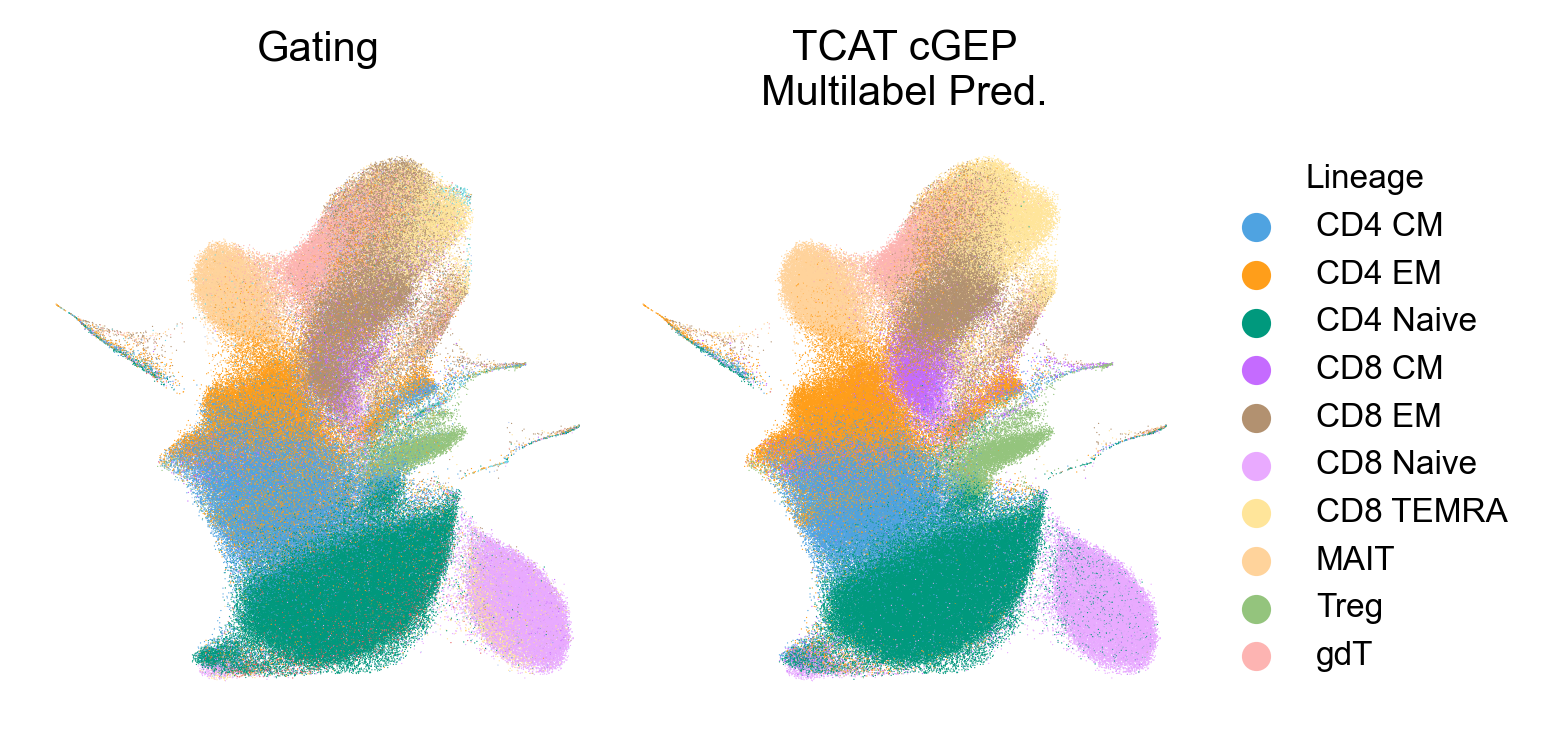

In [95]:
with plt.rc_context({'figure.dpi' : 300, 'figure.figsize' : (3, 3), 'legend.fontsize': tick_fontsize}):
    fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize = (5, 2.5), dpi = 300, 
                                gridspec_kw = {'wspace': 0.02})
    
    ax = axes[0]
    sc.pl.umap(adata_RNA, color =  'cell_gating', show = False, frameon = False,
                legend_fontsize = tick_fontsize, ax = ax)
    ax.get_legend().remove()
    ax.set_title('Gating\n', fontsize = label_fontsize)

    ax = axes[1]
    sc.pl.umap(adata_RNA_multi, color =  'Multinomial_Label', show = False, frameon = False,
                    legend_fontsize = tick_fontsize, ax = ax)
    ax.set_title('TCAT cGEP\nMultilabel Pred.', fontsize = label_fontsize)
    ax.get_legend().set_title('Lineage',  prop={'size':  tick_fontsize})

fig.savefig(os.path.join(figdir, 'SparksUMAP.Gating_Multinomial.png'), bbox_inches="tight")
fig.savefig(os.path.join(figdir, 'SparksUMAP.Gating_Multinomial.pdf'), bbox_inches="tight")

plt.show()

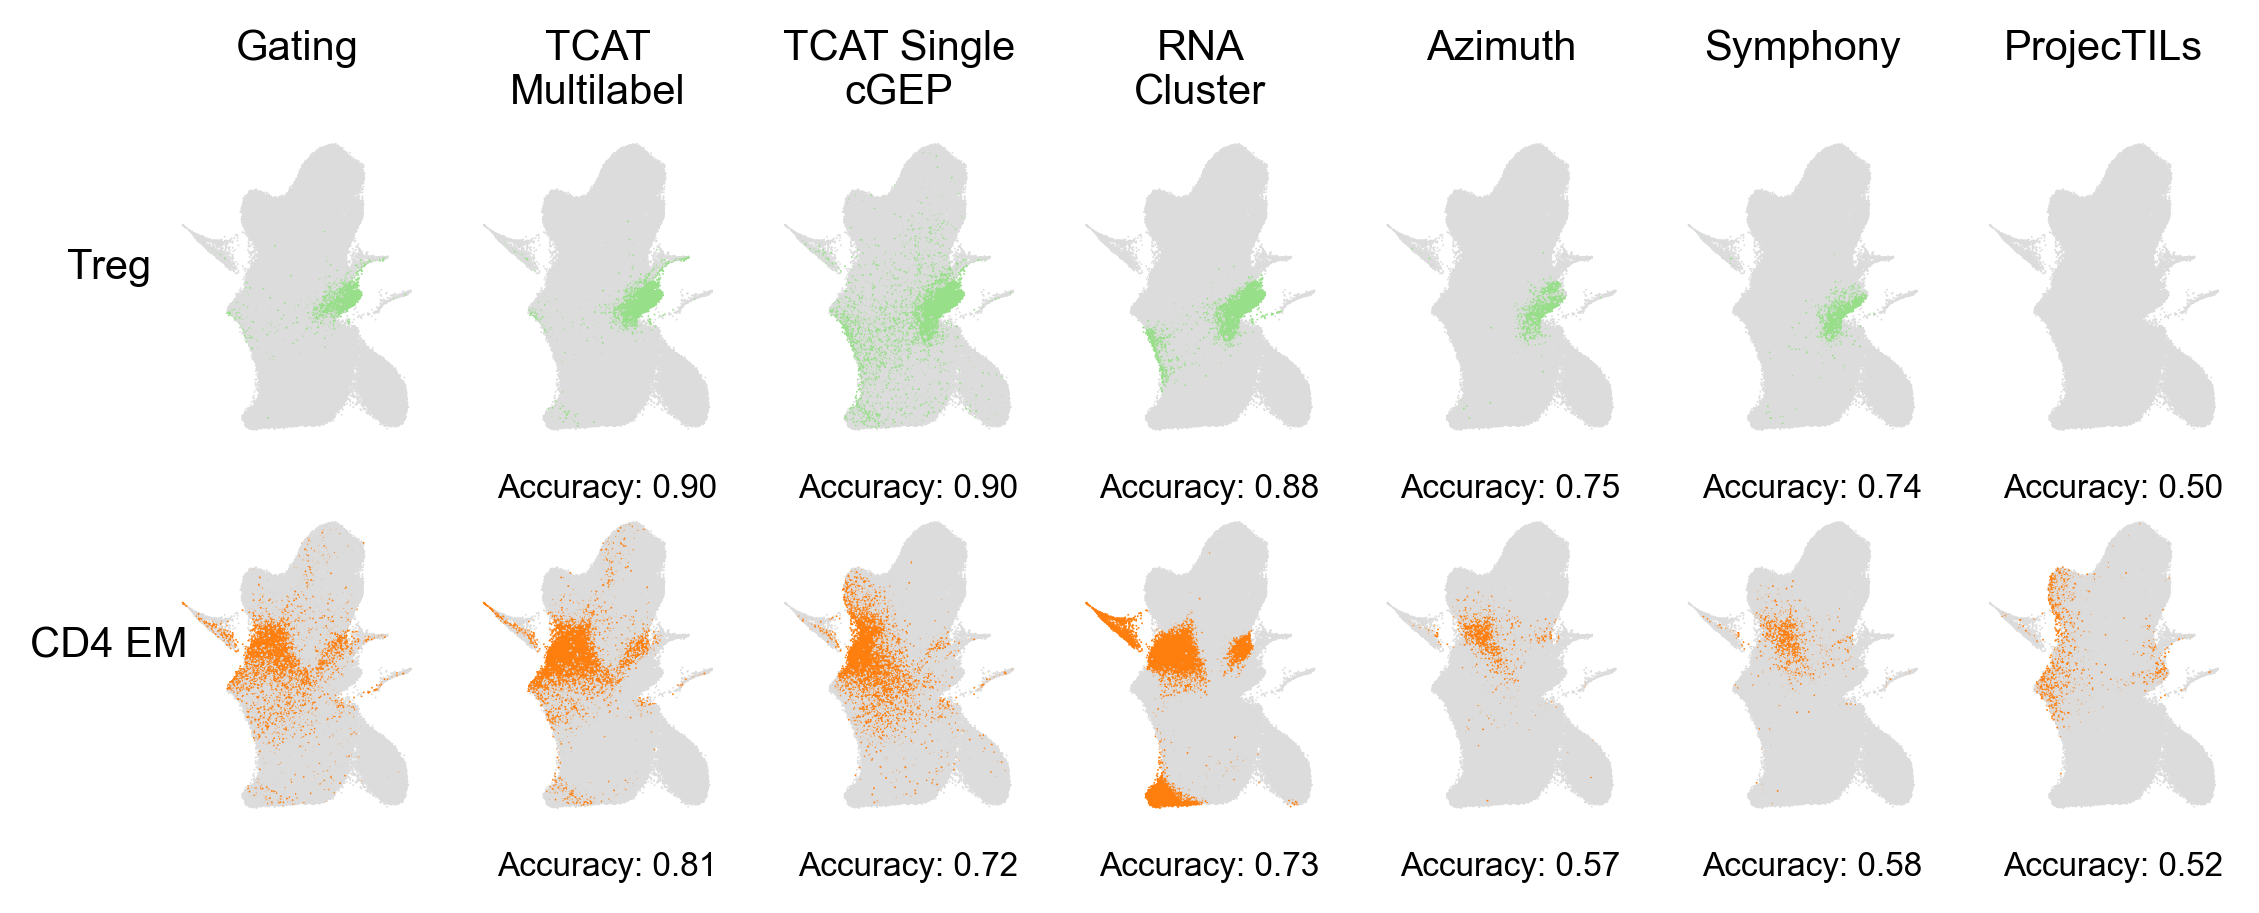

In [82]:
gates_to_plot = ['Treg', 'CD4_EM']
nrow = len(gates_to_plot)
ncol = 7
title_fontsize = 10
ylab_fontsize = 10

fig, ax = plt.subplots(nrows = nrow, ncols = ncol, figsize = (ncol*7/5, 3), dpi = 300,
                      gridspec_kw={'left':.2})

for i, gate in enumerate(gates_to_plot):
    gep = roc[roc['gate']==gate]['program'].unique()[0] #gate_dict[gate][0]
    # i = n // ncol
    # j = n % ncol
    cmap_binary_gate = colors.LinearSegmentedColormap.from_list("", ["gainsboro", gating_cmap[gate.replace('_', ' ')]], N = 2)

    # Gating
    j = 0
    c = meta.loc[ind, 'cell_gating']==gate
    ax[i, j].scatter(x = umap['UMAP1'], y = umap['UMAP2'], s = 0.2, edgecolors='none', 
               c  = cmap_binary_gate(c)).set_rasterized(True)
    ax[i, j].set_xticks([])
    ax[i, j].set_yticks([])
    ax[i, j].set_ylabel('\n'+gate.replace('_', ' '), fontsize = ylab_fontsize, rotation = 0, labelpad=15)

    if i==0:
        ax[i, j].set_title('Gating\n', fontsize = title_fontsize)

    for spine in ['top', 'right', 'left', 'bottom']:
        ax[i, j].spines[spine].set_visible(False)
        
        
    # Multinomial Logistic Regression
    j = 1
    c = pred_multi.loc[ind, :] == gate
    ax[i, j].scatter(x = umap['UMAP1'], y = umap['UMAP2'], s = 0.2, edgecolors='none', 
               c  = cmap_binary_gate(c)).set_rasterized(True)
    ax[i, j].set_xticks([])
    ax[i, j].set_yticks([])
    ax[i, j].text(x = -9, y = -9, s = 'Accuracy: %.2f' % accuracy_all.loc[gate, 'Multinomial_Label'], fontsize=8)
    
    if i==0:
        ax[i, j].set_title('TCAT\nMultilabel', fontsize = title_fontsize)

    for spine in ['top', 'right', 'left', 'bottom']:
        ax[i, j].spines[spine].set_visible(False)

                
    # Thresholded usages  
    j = 2
    c = usage_test.loc[ind, gep] > usage_thresh
    ax[i, j].scatter(x = umap['UMAP1'], y = umap['UMAP2'], s = 0.2, edgecolors='none', 
               c  = cmap_binary_gate(c)).set_rasterized(True)
    ax[i, j].set_xticks([])
    ax[i, j].set_yticks([])
    ax[i, j].text(x = -9, y = -9, s = 'Accuracy: %.2f' % accuracy_all.loc[gate, 'Usage'], fontsize=8)
    
    if i==0:
        ax[i, j].set_title('TCAT Single\ncGEP', fontsize = title_fontsize)

    for spine in ['top', 'right', 'left', 'bottom']:
        ax[i, j].spines[spine].set_visible(False)


    # RNA cluster
    j = 3
    rna_clus_types = rna_clus_accuracy[rna_clus_accuracy['cluster_col']==rna_cluster_col]
    rna_clus_types = rna_clus_types.loc[rna_clus_types['gate']==gate, 'clusters'].iloc[0].split(',')
    c = meta.loc[ind, rna_cluster_col].astype(str).isin(rna_clus_types)
    ax[i, j].scatter(x = umap['UMAP1'], y = umap['UMAP2'], s = 0.2, edgecolors='none', 
               c  = cmap_binary_gate(c)).set_rasterized(True)
    ax[i, j].set_xticks([])
    ax[i, j].set_yticks([])
    ax[i, j].text(x = -9, y = -9, s = 'Accuracy: %.2f' % accuracy_all.loc[gate, rna_cluster_col], fontsize=8)
    
    if i==0:
        ax[i, j].set_title('RNA\nCluster', # % rna_cluster_col,
                           fontsize = title_fontsize)

    for spine in ['top', 'right', 'left', 'bottom']:
        ax[i, j].spines[spine].set_visible(False)

        
    j = 4
    c = comp_all.loc[ind, 'predicted.celltype.l2_PredRename']==gate
    ax[i, j].scatter(x = umap['UMAP1'], y = umap['UMAP2'], s = 0.2, edgecolors='none', 
               c  = cmap_binary_gate(c)).set_rasterized(True)
    ax[i, j].set_xticks([])
    ax[i, j].set_yticks([])
    ax[i, j].text(x = -9, y = -9, s = 'Accuracy: %.2f' % accuracy_all.loc[gate, 'predicted.celltype.l2'], fontsize=8)

    if i==0:
        ax[i, j].set_title('Azimuth\n', fontsize = title_fontsize)

    for spine in ['top', 'right', 'left', 'bottom']:
        ax[i, j].spines[spine].set_visible(False)
    
    
    j = 5
    c = comp_all.loc[ind, 'cell_type_pred_knn_PredRename']==gate
    ax[i, j].scatter(x = umap['UMAP1'], y = umap['UMAP2'], s = 0.2, edgecolors='none', 
               c  = cmap_binary_gate(c)).set_rasterized(True)
    ax[i, j].set_xticks([])
    ax[i, j].set_yticks([])
    ax[i, j].text(x = -9, y = -9, s = 'Accuracy: %.2f' % accuracy_all.loc[gate, 'cell_type_pred_knn'], fontsize=8)

    if i==0:
        ax[i, j].set_title('Symphony\n', fontsize = title_fontsize)

    for spine in ['top', 'right', 'left', 'bottom']:
        ax[i, j].spines[spine].set_visible(False)
    
    
    j = 6
    c = comp_all.loc[ind, 'ProjecTILsAllT_functional.cluster_PredRename']==gate
    ax[i, j].scatter(x = umap['UMAP1'], y = umap['UMAP2'], s = 0.2, edgecolors='none', 
               c  = cmap_binary_gate(c)).set_rasterized(True)
    ax[i, j].set_xticks([])
    ax[i, j].set_yticks([])
    ax[i, j].text(x = -9, y = -9, s = 'Accuracy: %.2f' % accuracy_all.loc[gate, 'ProjecTILsAllT_functional.cluster'], fontsize=8)

    if i==0:
        ax[i, j].set_title('ProjecTILs\n', fontsize = title_fontsize)

    for spine in ['top', 'right', 'left', 'bottom']:
        ax[i, j].spines[spine].set_visible(False)

    
    '''
    # ADT cluster
    j = 4
    adt_clus_types = gate_dict[gate]
    c = meta.loc[ind, cluster_col].astype(str).isin(adt_clus_types)
    ax[i, j].scatter(x = umap['UMAP1'], y = umap['UMAP2'], s = 0.2, edgecolors='none', 
               c  = cmap_binary_gate(c))
    ax[i, j].set_xticks([])
    ax[i, j].set_yticks([])
    ax[i, j].text(x = -6, y = -7, s = 'Accuracy: %.2f' % accuracy.loc[gate, 'adt_clus'])
    
    if i==0:
        ax[i, j].set_title('RNA+ADT Cluster\n', fontsize = title_fontsize)
    '''

    for spine in ['top', 'right', 'left', 'bottom']:
        ax[i, j].spines[spine].set_visible(False)
plt.savefig(os.path.join(figdir, 'SparksUMAP.GatingUsageCluster.png'), bbox_inches="tight")
plt.savefig(os.path.join(figdir, 'SparksUMAP.GatingUsageCluster.pdf'), bbox_inches="tight")